# Flight Price Prediction Project

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
#Importing the libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

In [2]:
#Load the train dataset with pd.read_excel 
df_train = pd.read_excel("Data_Train.xlsx")

df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Here we are taking a look at the first 5 and last 5 rows of our entire training data set. It looks like the only column that has proper numeric data is "Price" which is also our target column making all the remaining columns as our features using which we need to predict our label. Since the values present in the "Price" column has continous data it makes this to be a Regression problem!

In [3]:
#Information of train datatype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Using the info method we can see that there is only 1 column with integer data type and 10 columns that have object data type.

In [4]:
#Shape of the train dataset
df_train.shape

(10683, 11)

The train dataset consists of 11 columns and 10683 rows.

In [5]:
#Data Types of train dataset
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In train dataset there are 10 columns which are of object datatype and 1 column of int datatype

# EDA

In [223]:
df_train.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.905448,1.952256,1.436154,1.458248,7.392998,8808.993728,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,9.915933,28.326624
std,2.099628,1.177276,1.474845,1.806320,1.214254,3816.215657,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,7.791897,16.945817
min,1.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,8.000000,4.000000,5.000000,4.000000,9.000000,14714.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,24.000000,55.000000


With the help of describe method we can see details for only numeric data type and since we have just 1 column with integer data type all the object data type columns got ignored. In the "Price" column we are able to take a look at the number of rows covered in our dataset being displayed in the count area, then we have the mean and standard deviation being reflected for our label column. Later on the values of minimum, 25% quartile, 50% quartile, 75% quartile and maximum number are being displayed above.

In [6]:
#Checking for missing values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In the above cell we are taking a look at null values and there are 2 columns "Route" and "Total_Stops" that have missing data.

In [7]:
#Drop the missing data
df_train.dropna(inplace=True)

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

I have removed the missing values and there is no missing values present now.

In [9]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Handling Date of Journey to convert into day and month

In [10]:
#Extracting the day and adding a new feature Journey_day
df_train['Journey_day'] = pd.to_datetime(df_train['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [11]:
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [12]:
#Extracting the month and adding a new feature Journey_month
df_train['Journey_month'] = pd.to_datetime(df_train['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [13]:
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Since I have made separate columns for Day and Month , I will drop the main column i.e Date_of_Journey

In [14]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [15]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Now I will handle Dep_Time and convert into hours and minutes

In [16]:
#Extracting the hours and adding them to Dep_Hour feature
df_train['Dep_hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour

df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16


In [17]:
#Extracting the Minutes and adding them to Dep_minutes feature
df_train['Dep_minutes'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Since I have made separate columns for hour and minutes , I will drop the main column i.e Dep_Time

In [18]:
df_train.drop(['Dep_Time'],axis=1,inplace=True)

In [19]:
#Updated df_train 
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Handling Arrival Time into hour and minute

In [20]:
#Extracting the hours and adding them to Arr_hour feature
df_train['Arr_hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour

df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21


In [21]:
#Extracting the Minutes and adding them to Arr_minutes feature
df_train['Arr_minute'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Since I have made separate columns for hour and minutes , I will drop the main column i.e Arrival_Time

In [22]:
df_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [23]:
#Updated df_train
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Handing Duration Time

In [24]:
duration = list(df_train['Duration'])

len(duration)


10682

In [25]:
#Taking a for loop with duration list length as the range
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    #Checking if duration contains only hours or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   #Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           #Adds 0 hour


#Taking empty lists
duration_hours = []
duration_mins = []

#Appending the extracted data to these empty lists in integer format
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    #Extract hours from duration 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   #Extracting only minutes from duration

In [26]:
#Converting list into dataframe
df_train['Duration_hours'] = duration_hours
df_train['Duration_minutes'] = duration_mins

In [27]:
#Updated dataframe
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
#Drop Duration since I have made separate columns for hours and minutes
df_train.drop(['Duration'],axis=1,inplace=True)

In [29]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
df_train.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_day          int64
Journey_month        int64
Dep_hour             int64
Dep_minutes          int64
Arr_hour             int64
Arr_minute           int64
Duration_hours       int64
Duration_minutes     int64
dtype: object

# Univariate Analysis

Now I will start with the visualization technique for train dataset

In [31]:
categorical_variables = df_train.select_dtypes(include=['O'])

categorical_variables

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


Exploring with count plot 

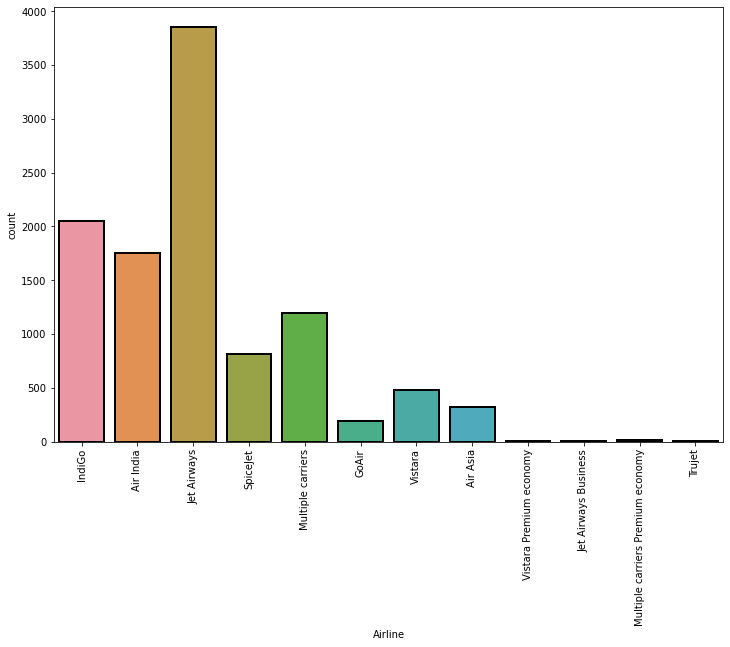

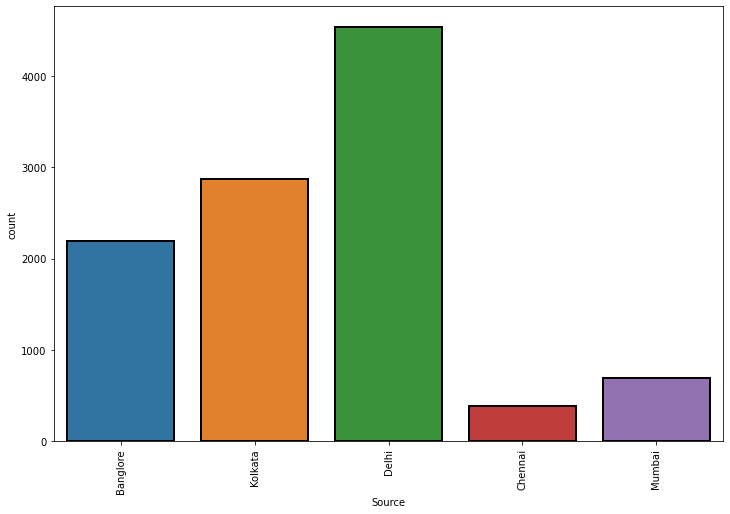

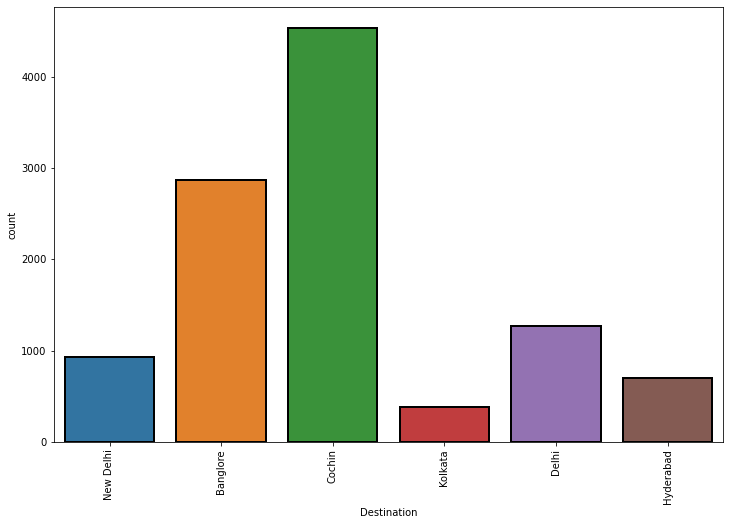

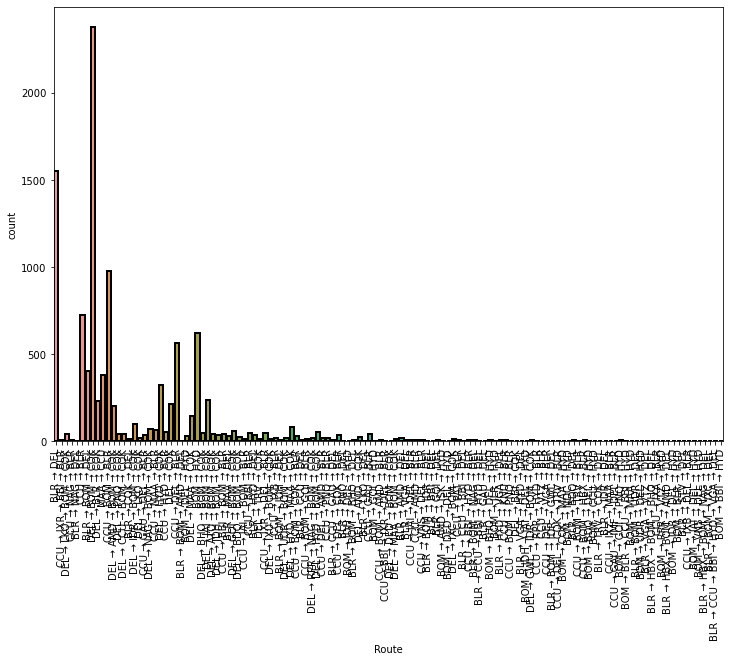

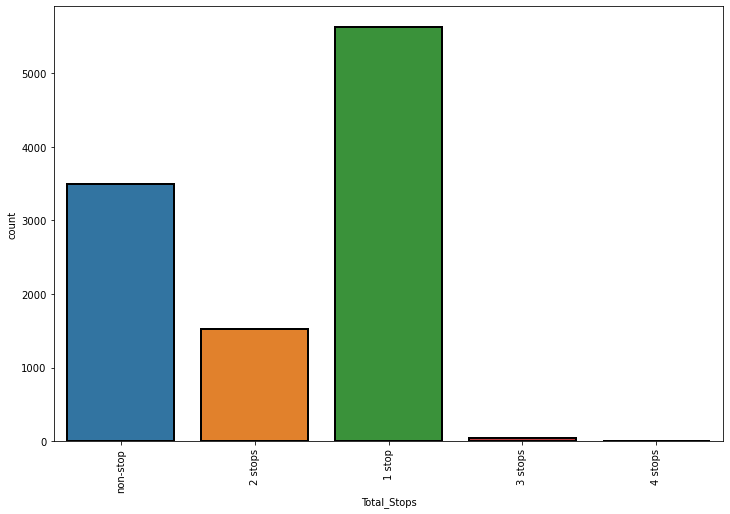

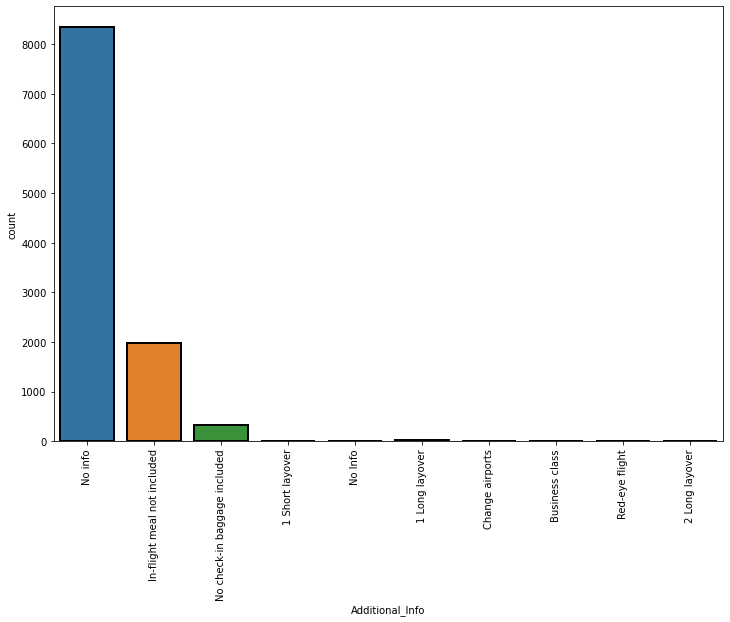

In [32]:
for i in categorical_variables:
    plt.figure(figsize=(12,8))
    sns.countplot(df_train[i],edgecolor='black',linewidth=2)
    plt.xticks(rotation=90)
    plt.show()
    

In the total stops column we see highest count of rows covered by 1 stop flight hauls and the least numbers are for 3 and 4 stops

In additional information column most number of rows are covered by no info values and rest of the values cover very less to negligible data points

The airline column shows that highest number of flight details are present in our dataset for Jet Airways followed by Indigo and Air India

The departure minute column gives us the indication that most number of flights get scheduled at 0 minutes for departure

The departure hour column gives us the indication that most number of flights get scheduled at 7 and 9 hour morning time and then there is a spike at 17 and 20 hour evening time

The arrival minute column gives us the indication that most number of flights get scheduled at 0 minutes for arrival

The arrival hour column gives us the indication that most number of flights get scheduled at 19 hour in the evening and then the chosen option for arrivals are 12 in the noon or 4 in the night

In [33]:
numerical_variables = df_train.select_dtypes(include=['int64'])
numerical_variables

,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,1,3,11,30,14,10,2,40


exploring with distplot

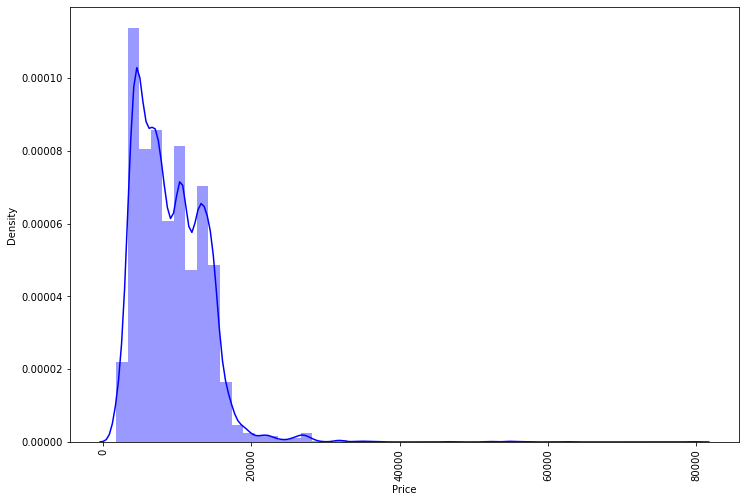

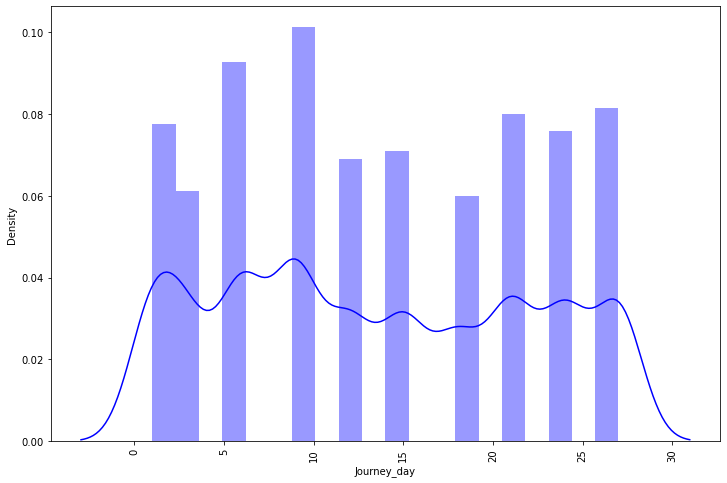

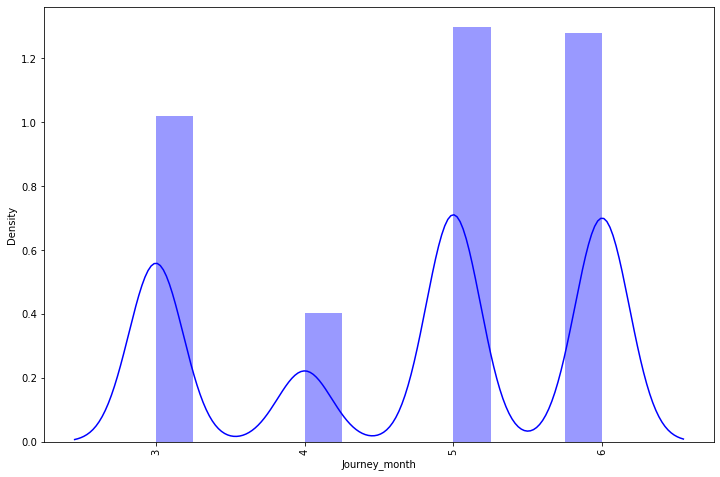

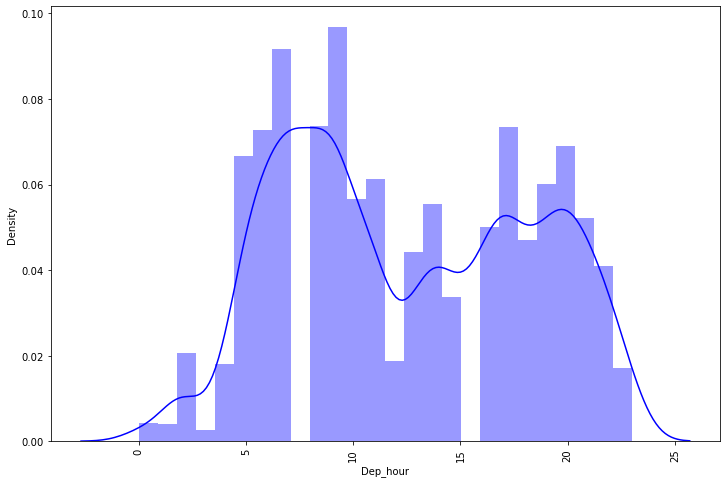

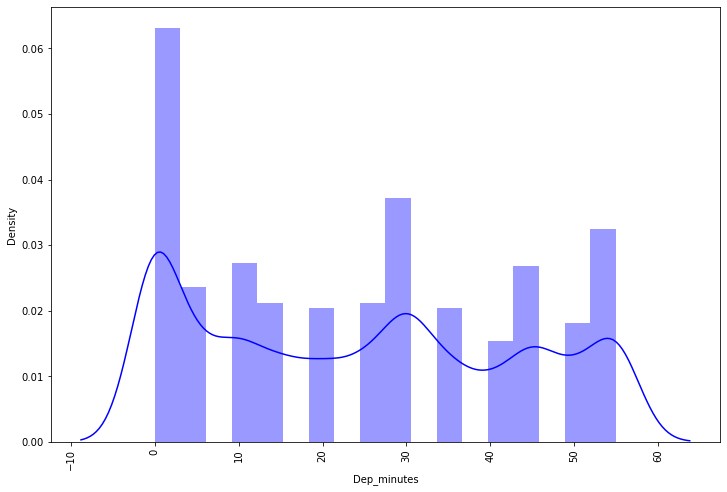

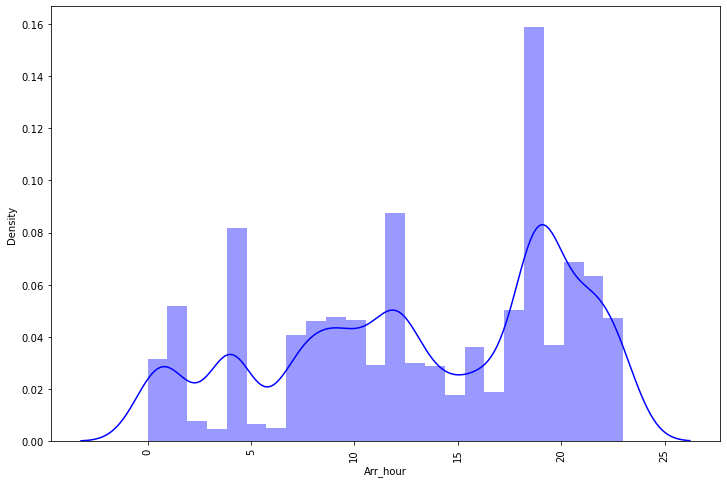

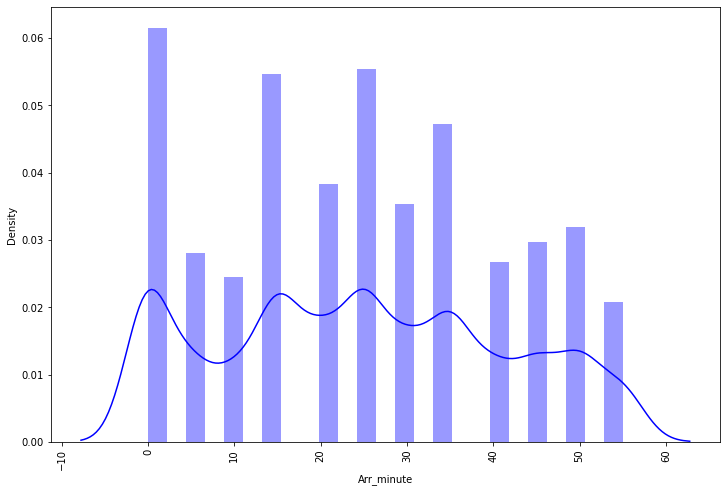

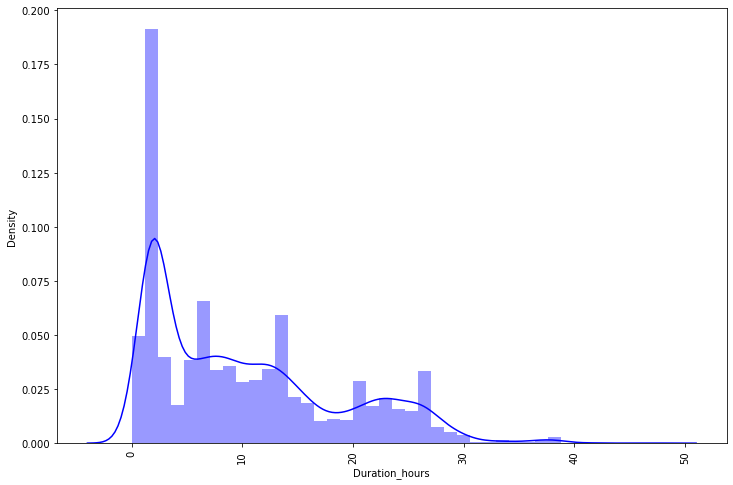

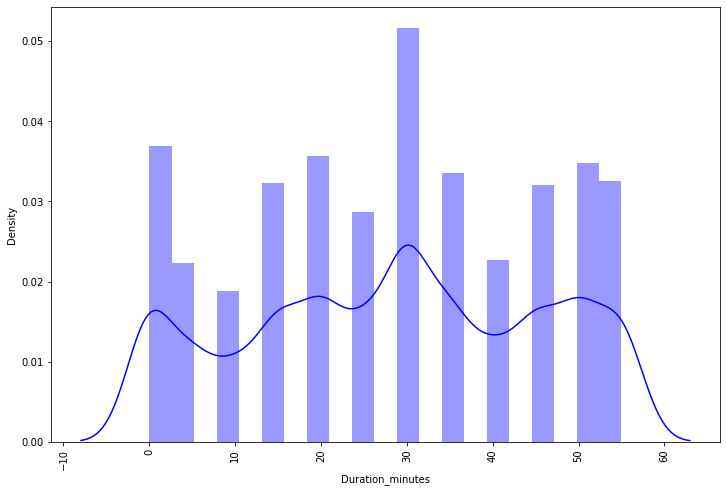

In [34]:
for v in numerical_variables:
    plt.figure(figsize=(12,8))
    sns.distplot(df_train[v],color='blue')
    plt.xticks(rotation=90)
    plt.show()

exploring numerical variables with histogram

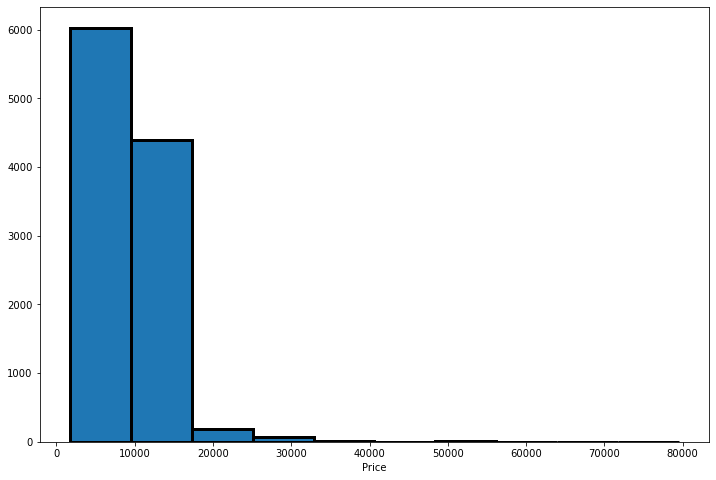

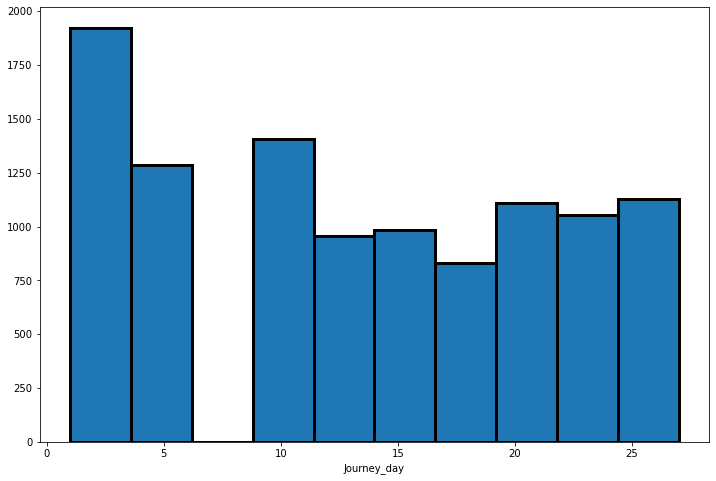

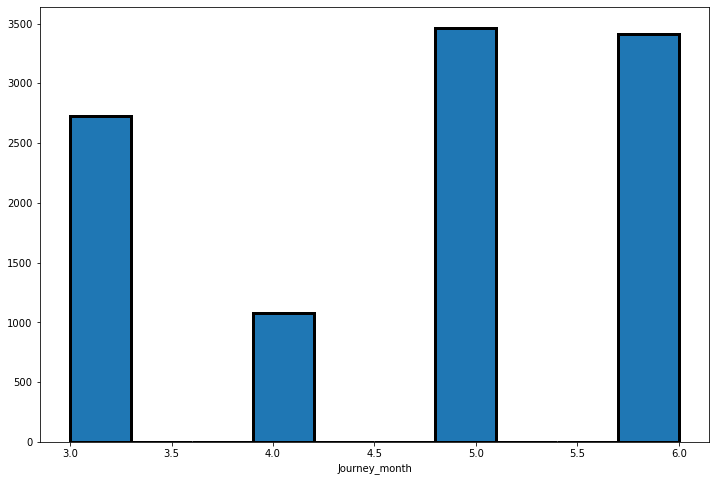

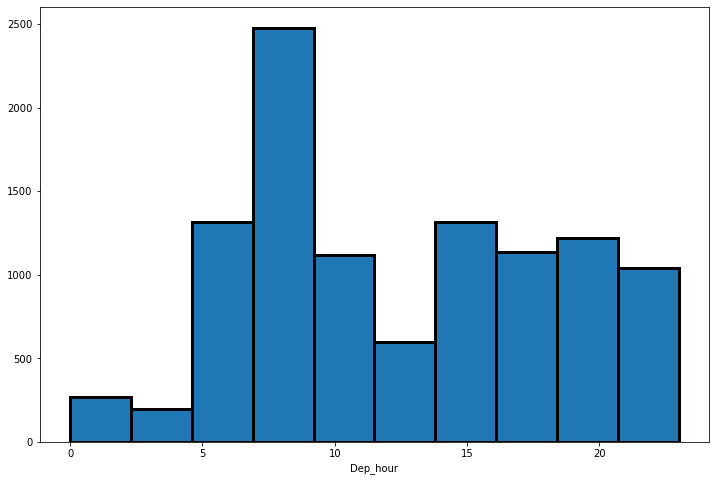

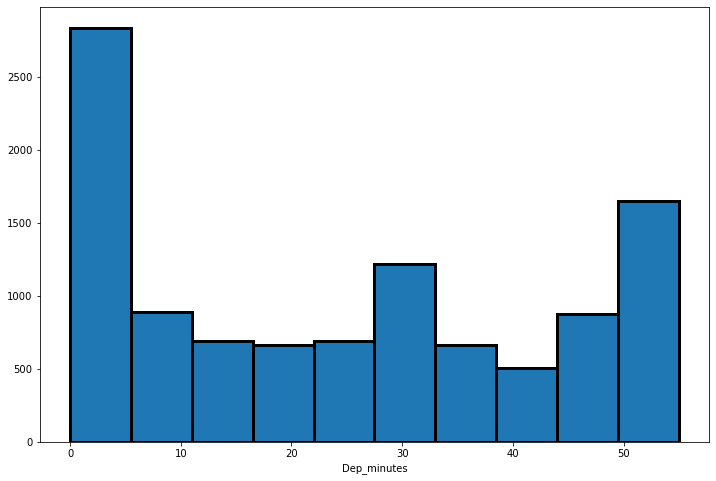

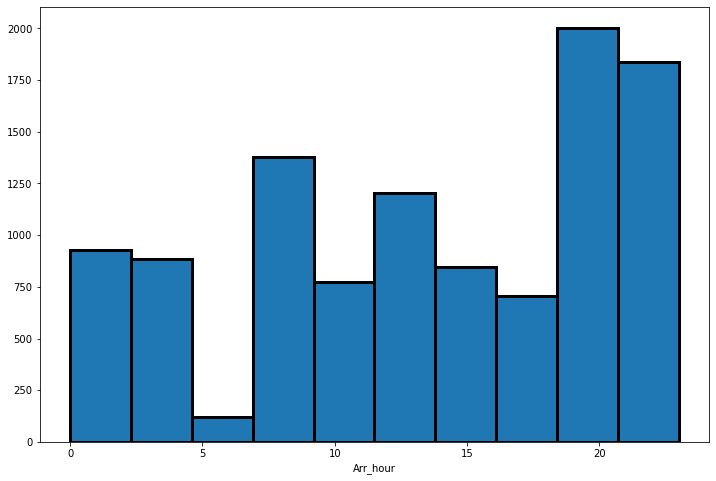

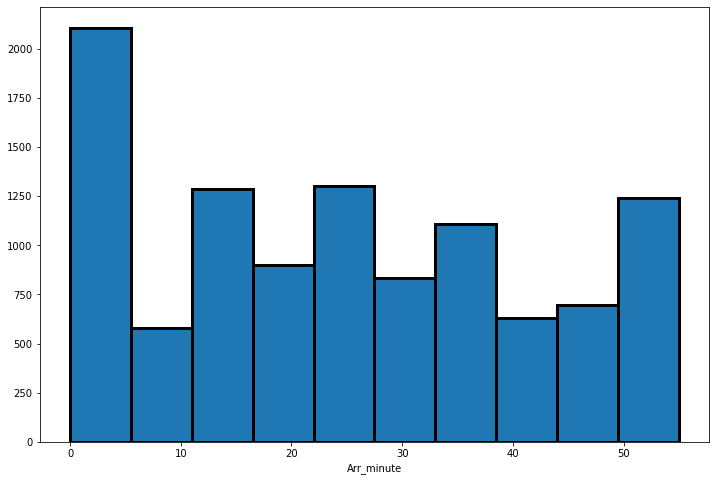

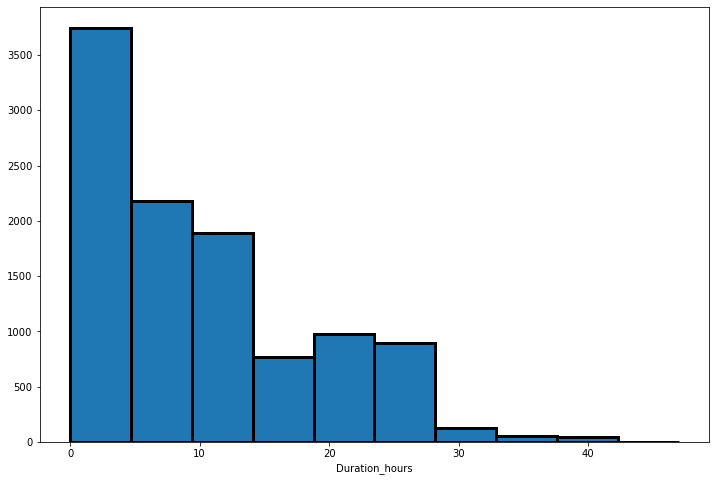

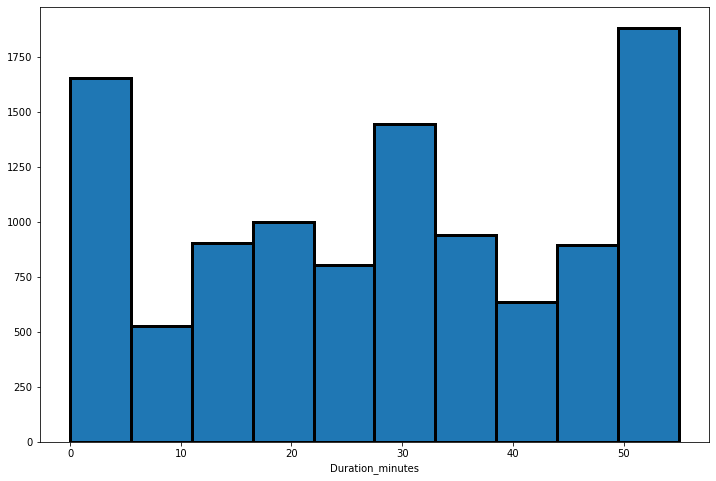

In [35]:
for v in numerical_variables:
    plt.figure(figsize=(12,8))
    plt.hist(df_train[v],edgecolor='black',linewidth=3)
    plt.xlabel(v)
    plt.show

# Bivariate Analysis

The target variable is Price and I will explore the target variable with categorical variables

Exploring data with scatter plot 

<Figure size 864x1080 with 0 Axes>

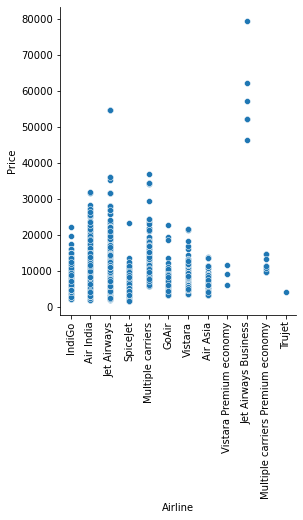

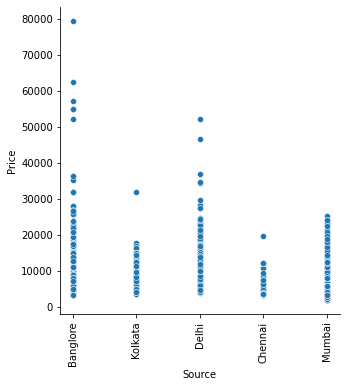

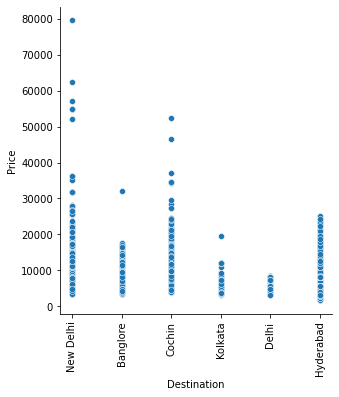

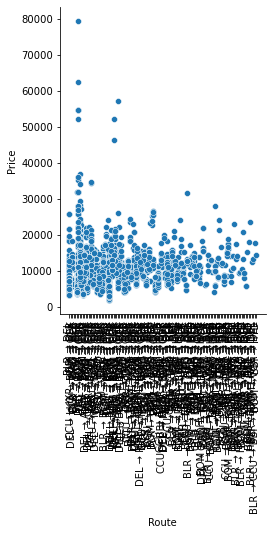

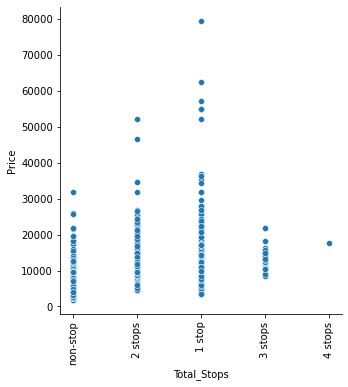

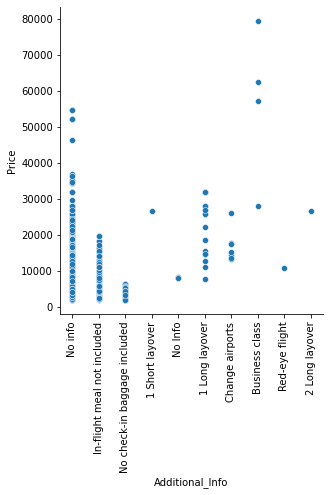

In [36]:
plt.figure(figsize=(12,15))
for i in categorical_variables:
    sns.relplot(df_train[i],df_train['Price'])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

Exploring data with line plot

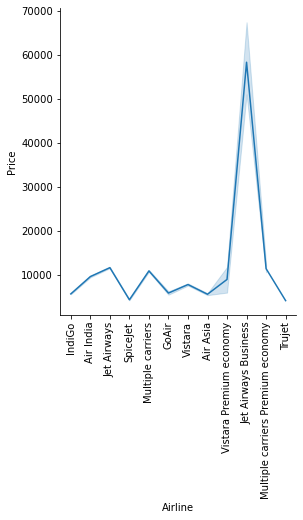

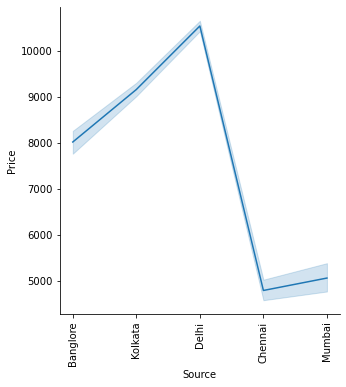

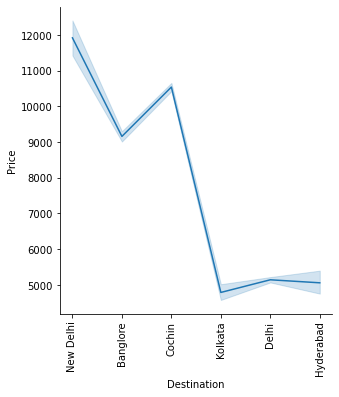

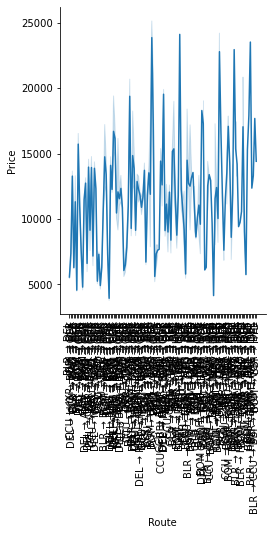

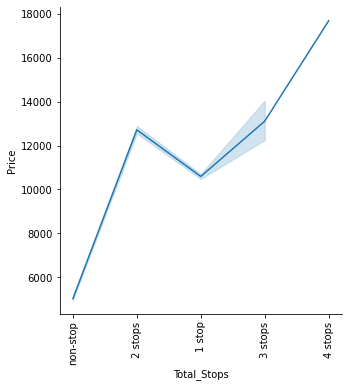

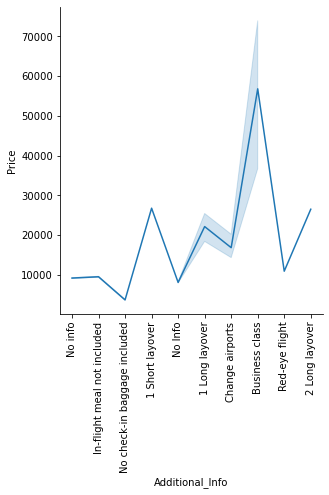

In [37]:
for i in categorical_variables:
    sns.relplot(df_train[i],df_train['Price'],kind='line')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

Exploring data with catplot

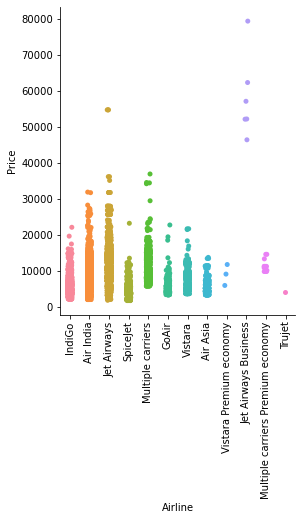

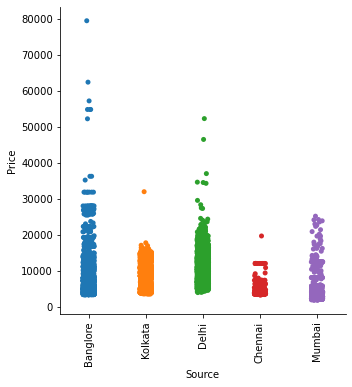

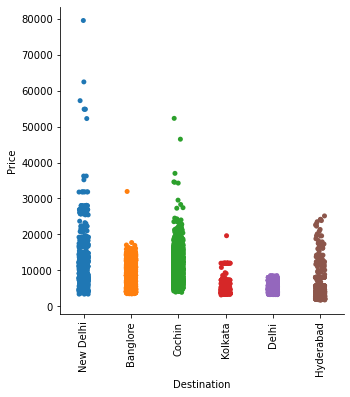

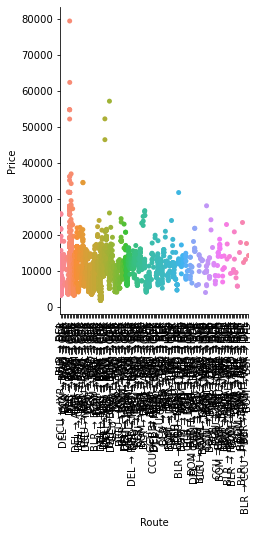

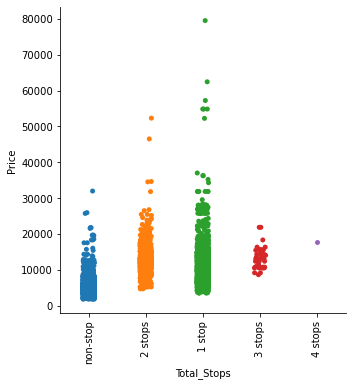

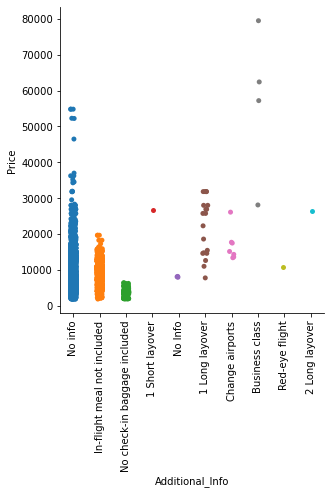

In [38]:
for i in categorical_variables:
    sns.catplot(x=i,y='Price',data=df_train)
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

Now I will explore numerical variables with the target variable

Line Plot

<Figure size 864x576 with 0 Axes>

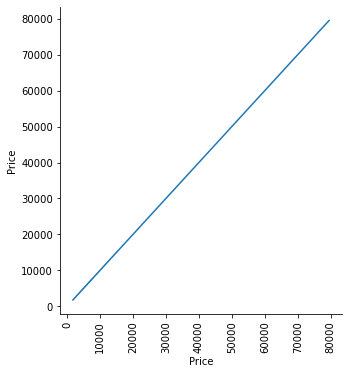

<Figure size 864x576 with 0 Axes>

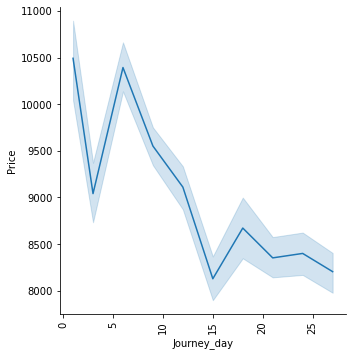

<Figure size 864x576 with 0 Axes>

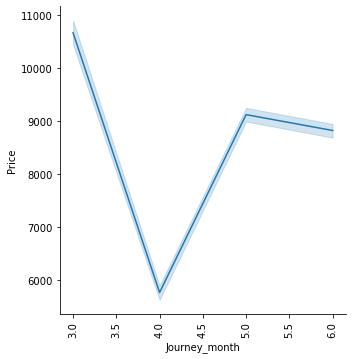

<Figure size 864x576 with 0 Axes>

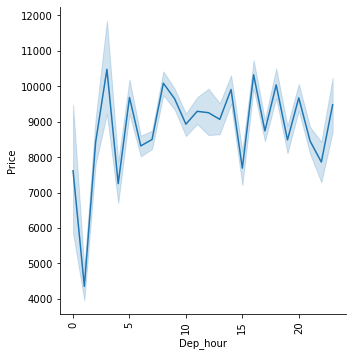

<Figure size 864x576 with 0 Axes>

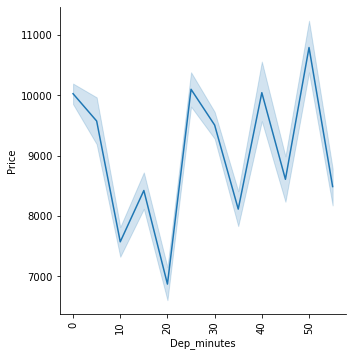

<Figure size 864x576 with 0 Axes>

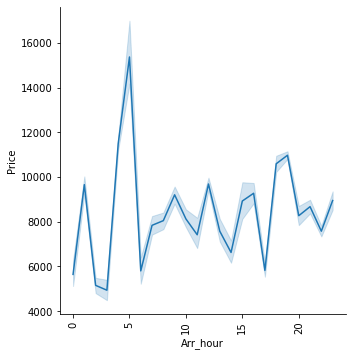

<Figure size 864x576 with 0 Axes>

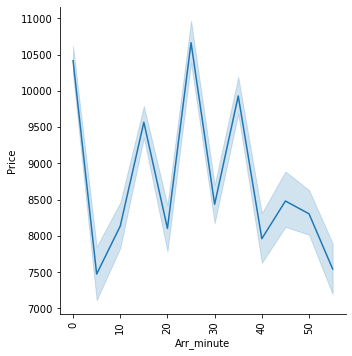

<Figure size 864x576 with 0 Axes>

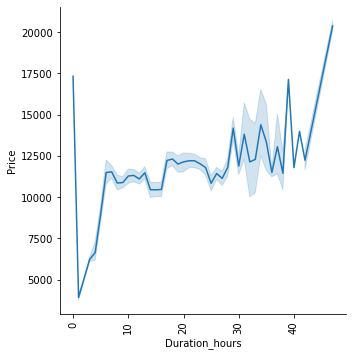

<Figure size 864x576 with 0 Axes>

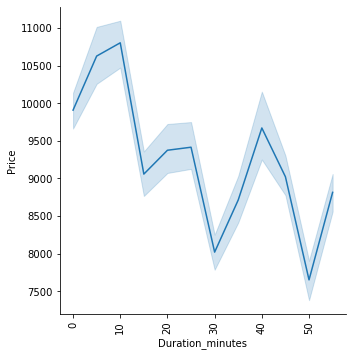

In [39]:
for i in numerical_variables:
    plt.figure(figsize=(12,8))
    sns.relplot(df_train[i],df_train['Price'],kind='line')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

Scatter Plot

<Figure size 864x576 with 0 Axes>

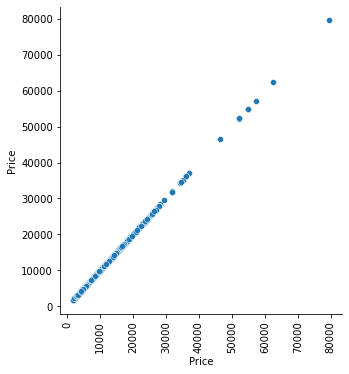

<Figure size 864x576 with 0 Axes>

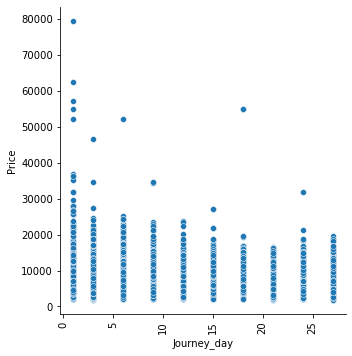

<Figure size 864x576 with 0 Axes>

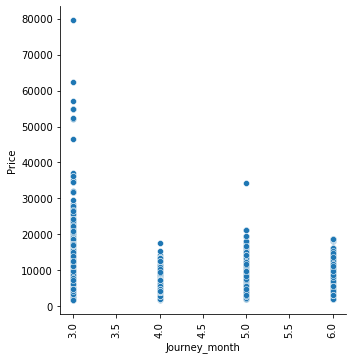

<Figure size 864x576 with 0 Axes>

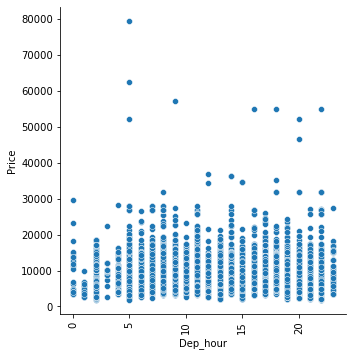

<Figure size 864x576 with 0 Axes>

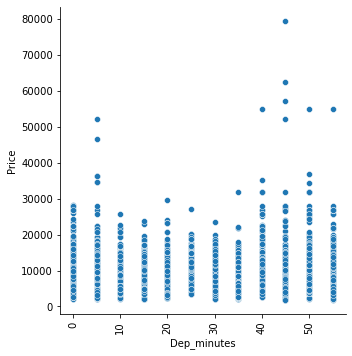

<Figure size 864x576 with 0 Axes>

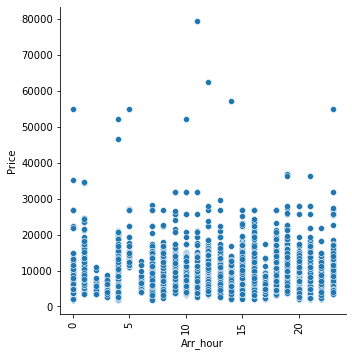

<Figure size 864x576 with 0 Axes>

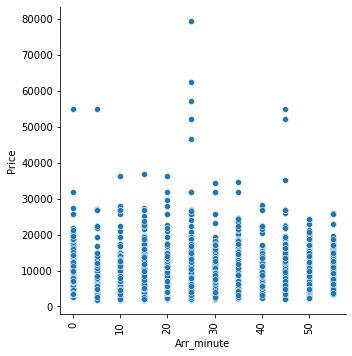

<Figure size 864x576 with 0 Axes>

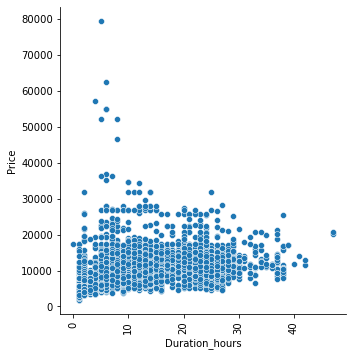

<Figure size 864x576 with 0 Axes>

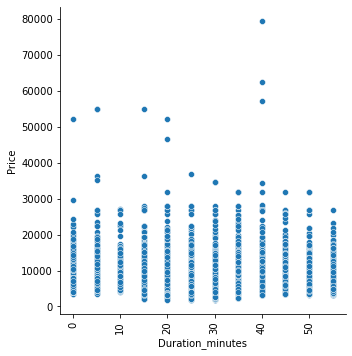

In [40]:
for i in numerical_variables:
    plt.figure(figsize=(12,8))
    sns.relplot(df_train[i],df_train['Price'],kind='scatter')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

Bar Plot

In [41]:
numerical_variables.columns

Index(['Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_minutes',
       'Arr_hour', 'Arr_minute', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

<AxesSubplot:xlabel='Journey_day', ylabel='Price'>

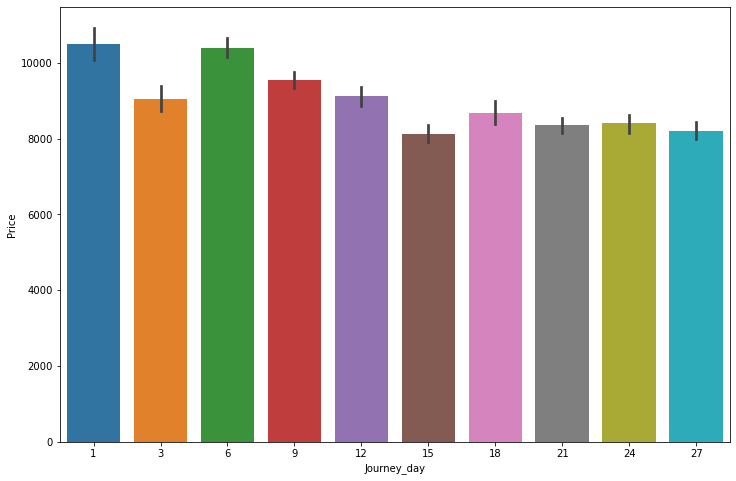

In [42]:
#Journey_Day
plt.figure(figsize=(12,8))
sns.barplot(df_train['Journey_day'],df_train['Price'])

<AxesSubplot:xlabel='Journey_month', ylabel='Price'>

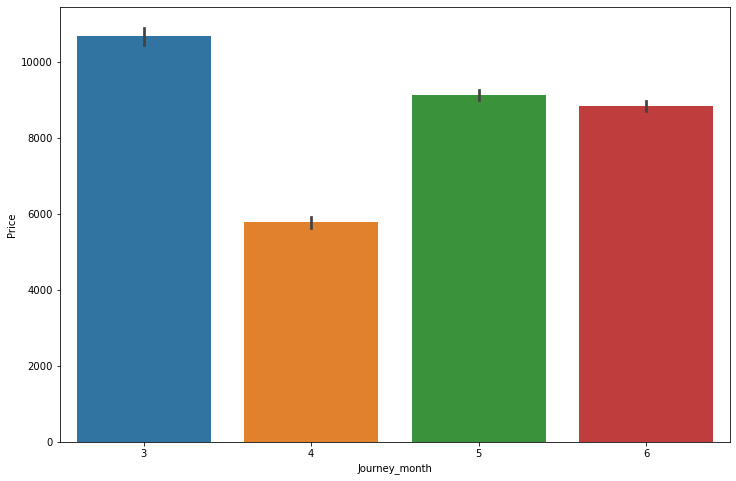

In [43]:
#Journey_month
plt.figure(figsize=(12,8))
sns.barplot(df_train['Journey_month'],df_train['Price'])

<AxesSubplot:xlabel='Dep_hour', ylabel='Price'>

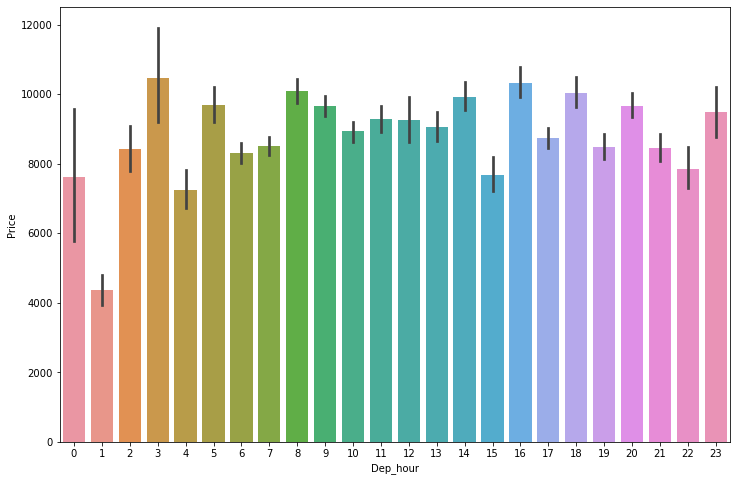

In [44]:
#Dep_hour
plt.figure(figsize=(12,8))
sns.barplot(df_train['Dep_hour'],df_train['Price'])

<AxesSubplot:xlabel='Dep_minutes', ylabel='Price'>

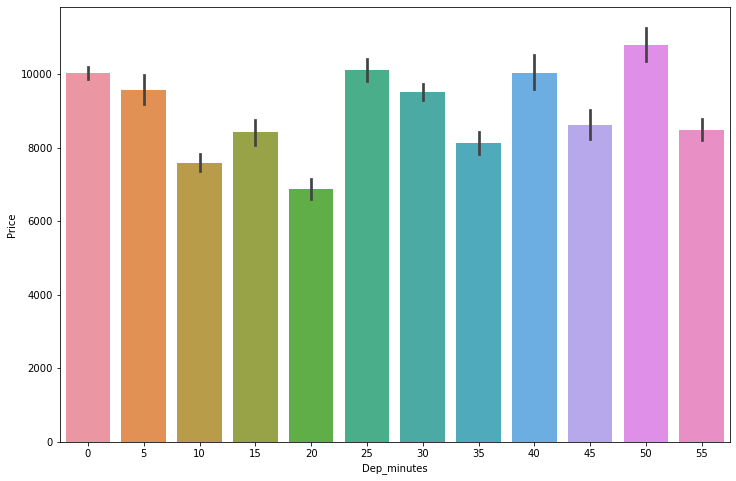

In [45]:
#Dep_minutes
plt.figure(figsize=(12,8))
sns.barplot(df_train['Dep_minutes'],df_train['Price'])

<AxesSubplot:xlabel='Arr_hour', ylabel='Price'>

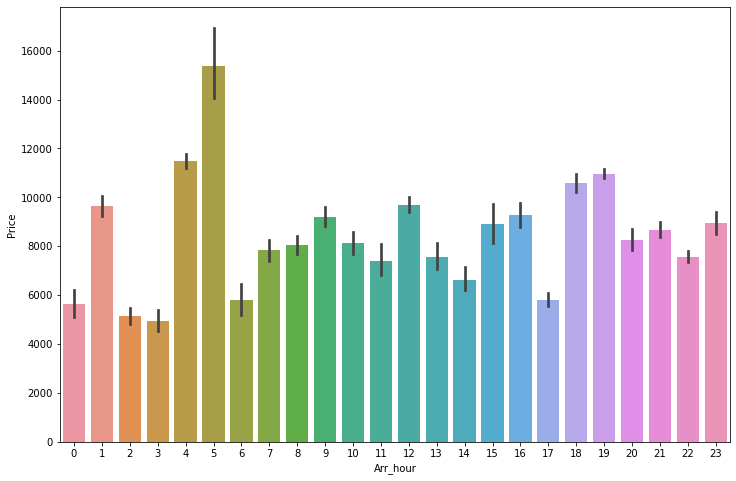

In [46]:
#Arr_hour
plt.figure(figsize=(12,8))
sns.barplot(df_train['Arr_hour'],df_train['Price'])

<AxesSubplot:xlabel='Arr_minute', ylabel='Price'>

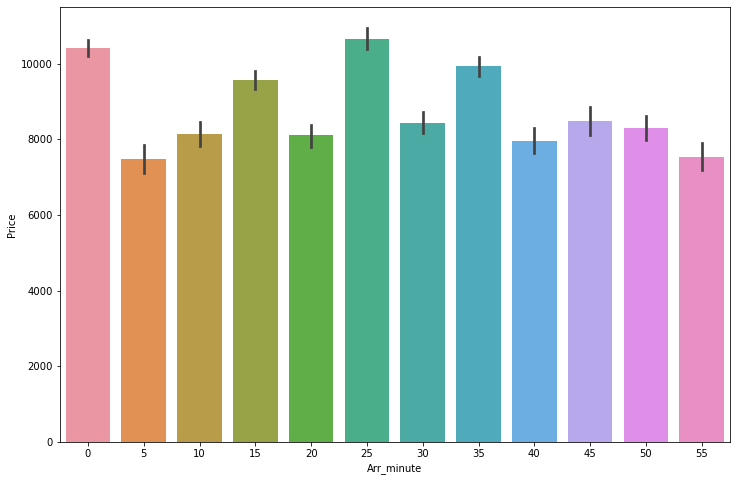

In [47]:
#Arr_minutes
plt.figure(figsize=(12,8))
sns.barplot(df_train['Arr_minute'],df_train['Price'])

<AxesSubplot:xlabel='Duration_hours', ylabel='Price'>

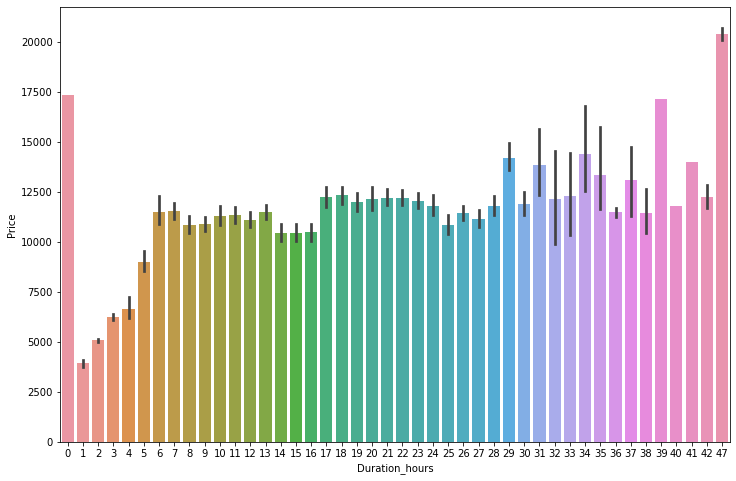

In [48]:
#Duration_hour
plt.figure(figsize=(12,8))
sns.barplot(df_train['Duration_hours'],df_train['Price'])

<AxesSubplot:xlabel='Duration_minutes', ylabel='Price'>

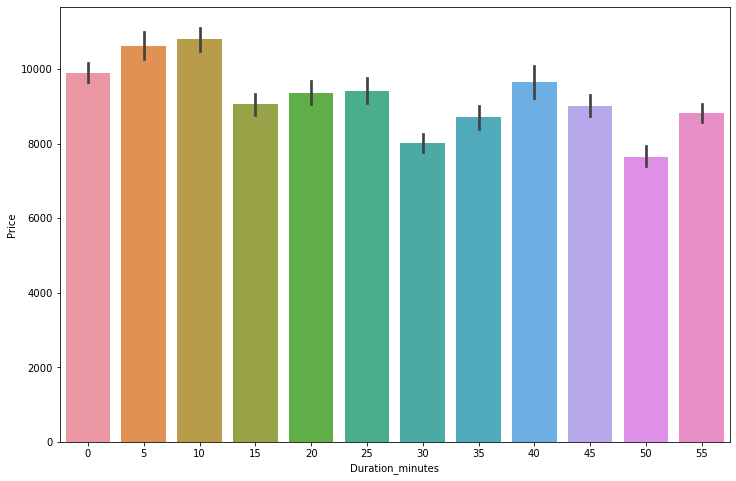

In [49]:
#Duration_minutes
plt.figure(figsize=(12,8))
sns.barplot(df_train['Duration_minutes'],df_train['Price'])

Now I will use JointPlot to visualize the data

Joint Plot

<Figure size 864x576 with 0 Axes>

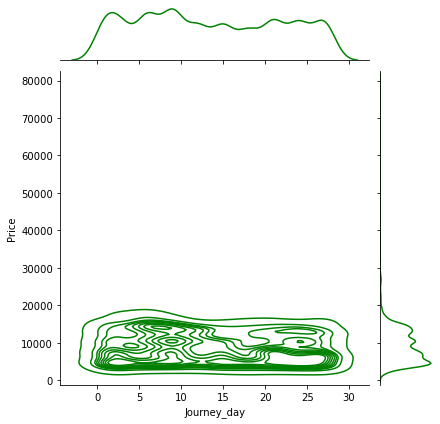

In [50]:
#Journey_day
plt.figure(figsize=(12,8))
sns.jointplot(x='Journey_day',y='Price',data=df_train,color='green',kind='kde')

<Figure size 864x576 with 0 Axes>

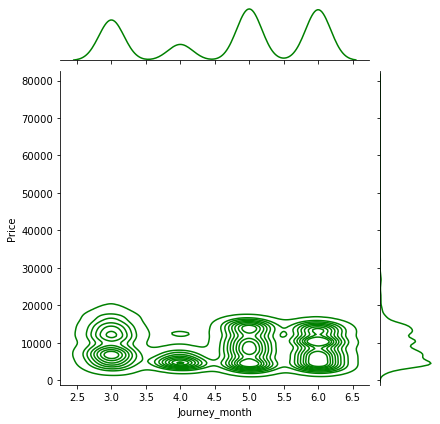

In [51]:
#Journey_month
plt.figure(figsize=(12,8))
sns.jointplot(x='Journey_month',y='Price',data=df_train,color='green',kind='kde')

<Figure size 864x576 with 0 Axes>

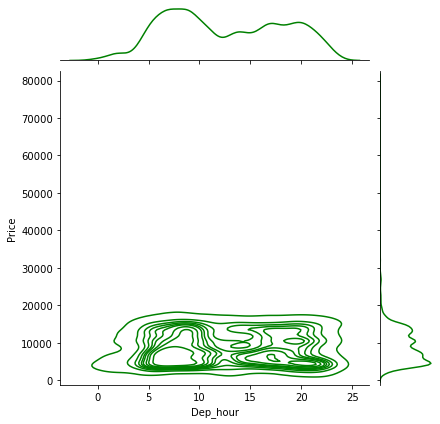

In [52]:
#Dep_hour
plt.figure(figsize=(12,8))
sns.jointplot(x='Dep_hour',y='Price',data=df_train,color='green',kind='kde')

<Figure size 864x576 with 0 Axes>

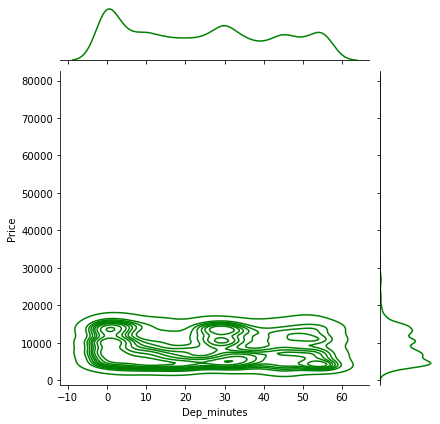

In [53]:
#Dep_minutes
plt.figure(figsize=(12,8))
sns.jointplot(x='Dep_minutes',y='Price',data=df_train,color='green',kind='kde')

<Figure size 864x576 with 0 Axes>

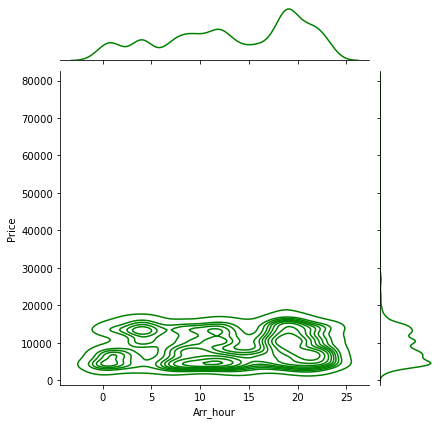

In [54]:
#Arr_hour
plt.figure(figsize=(12,8))
sns.jointplot(x='Arr_hour',y='Price',data=df_train,color='green',kind='kde')

<Figure size 864x576 with 0 Axes>

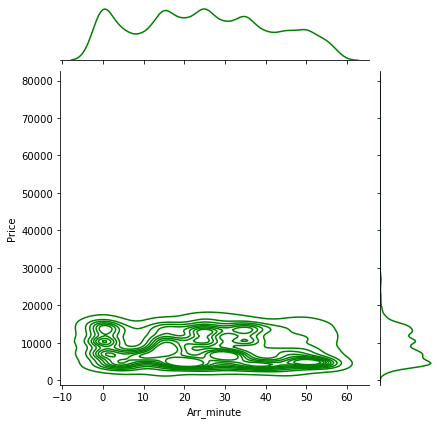

In [55]:
#Arr_minutes
plt.figure(figsize=(12,8))
sns.jointplot(x='Arr_minute',y='Price',data=df_train,color='green',kind='kde')

<Figure size 864x576 with 0 Axes>

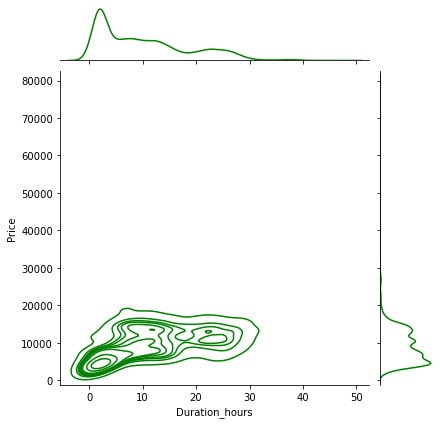

In [56]:
#Duration_hour
plt.figure(figsize=(12,8))
sns.jointplot(x='Duration_hours',y='Price',data=df_train,color='green',kind='kde')

<Figure size 864x576 with 0 Axes>

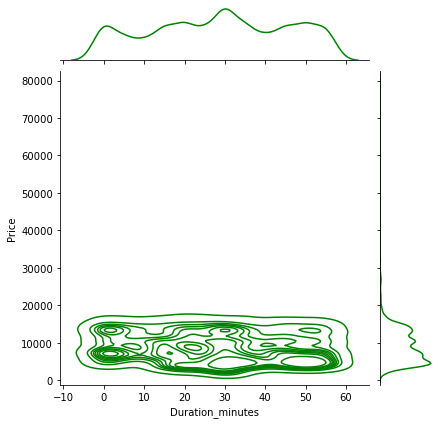

In [57]:
#Duration_minutes
plt.figure(figsize=(12,8))
sns.jointplot(x='Duration_minutes',y='Price',data=df_train,color='green',kind='kde')

# Encoding

Converting categorical variables into numerical variables

In [58]:
categorical_variables.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [59]:
#Dropping Route column because there are similar columns like Source and Destination
categorical_variables = categorical_variables.drop(['Route'],axis=1)

categorical_variables.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [60]:
#Dropping Route from df_train dataset also
df_train = df_train.drop(['Route'],axis=1)

df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


I will use Label Encoder to convert it

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [62]:
#Encoding for Categorical variables
for i in categorical_variables:
    df_train[i] = le.fit_transform(df_train[i])
    df_train[i]

In [63]:
#After encoding , updated df_train
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
0,3,0,5,4,8,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,8,13302,1,3,16,50,21,35,4,45


# Outliers

Checking for outlier detection

In [64]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
0,3,0,5,4,8,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,8,13302,1,3,16,50,21,35,4,45


In [65]:
df_train.shape

(10682, 14)

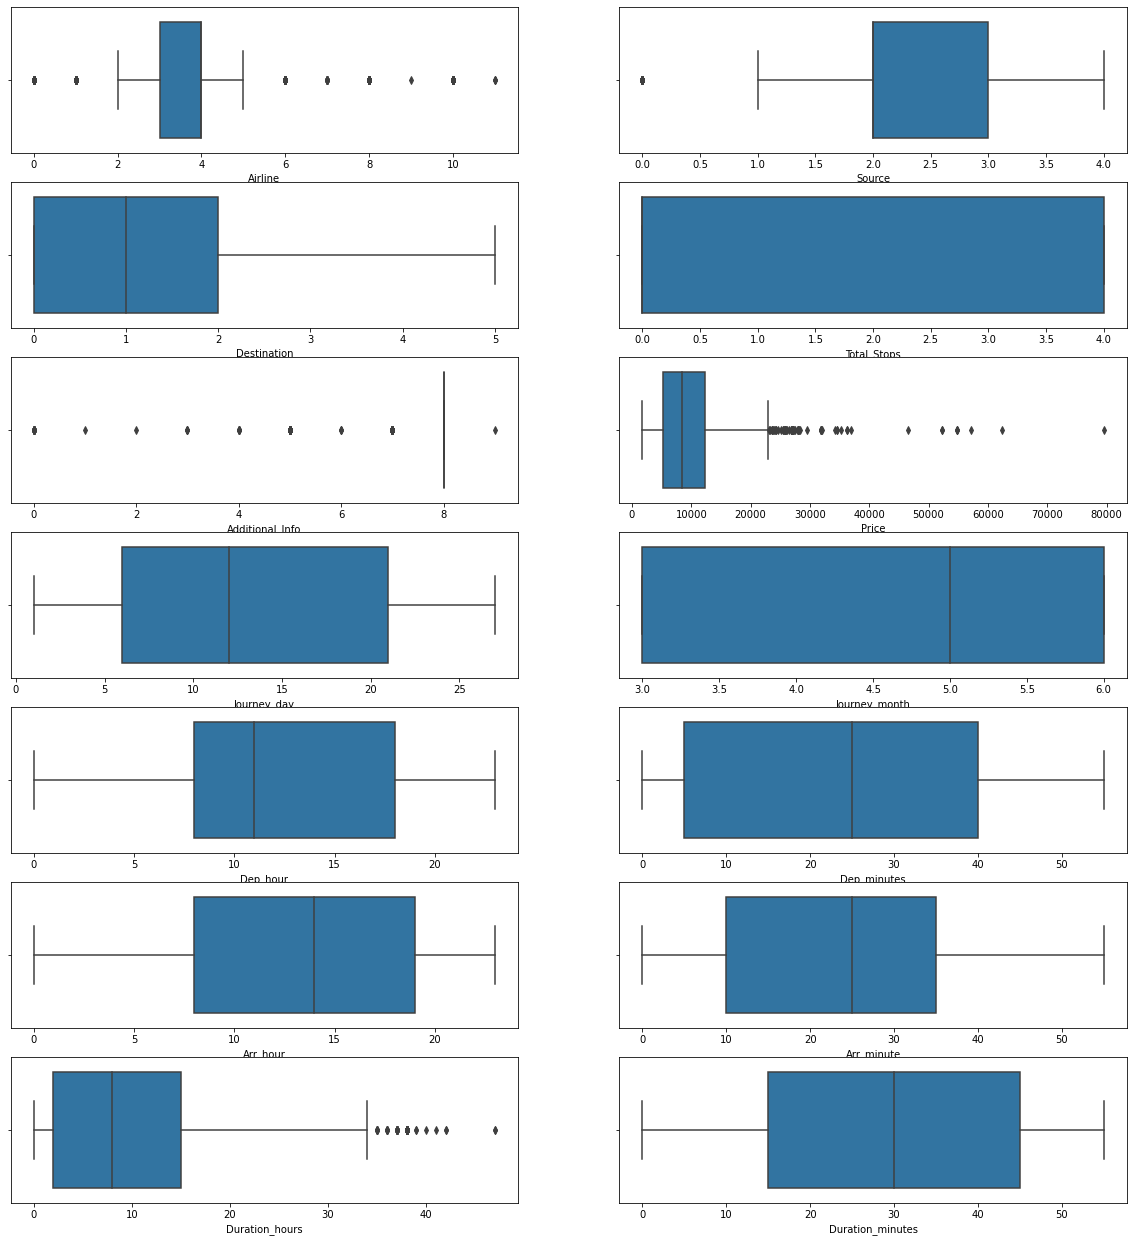

In [66]:
#Outlier Detection
plt.figure(figsize=(20,22),facecolor='white')
plotno = 1
for i in df_train:
    if plotno <= 14:
        ax = plt.subplot(7,2,plotno)
        sns.boxplot(df_train[i])
    plotno += 1
plt.show()

Outliers are present in Airline,Source,Price,Duration_hours

Outlier Treatment

In [67]:
#Airline
print(df_train['Airline'].quantile(0.10))
print(df_train['Airline'].quantile(0.90))

1.0
8.0


In [68]:
df_train['Airline'] = np.where(df_train['Airline'] > 8.0,8.0,df_train['Airline'])

df_train['Airline'] = np.where(df_train['Airline'] < 1.0,1.0,df_train['Airline'])

4.0    3849
1.0    2070
3.0    2053
8.0    1301
6.0    1196
2.0     194
7.0      13
5.0       6
Name: Airline, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


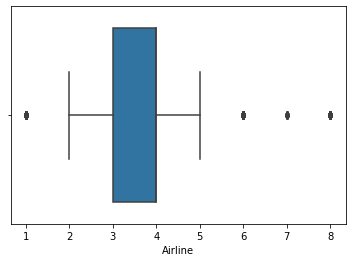

In [69]:
print(df_train['Airline'].value_counts())
print(sns.boxplot(df_train['Airline']))

In [70]:
#Source
print(df_train['Source'].quantile(0.10))
print(df_train['Source'].quantile(0.90))

0.0
3.0


In [71]:
df_train['Source'] = np.where(df_train['Source'] < 0.0,0.0,df_train['Source'])

2.0    4536
3.0    2871
0.0    2197
4.0     697
1.0     381
Name: Source, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


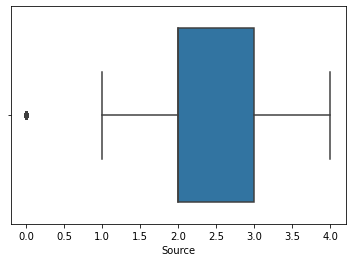

In [72]:
print(df_train['Source'].value_counts())
print(sns.boxplot(df_train['Source']))

In [73]:
#Price
print(df_train['Price'].quantile(0.10))
print(df_train['Price'].quantile(0.90))

3943.0
14714.0


In [74]:
df_train['Price'] = np.where(df_train['Price'] > 14714.0,14714.0,df_train['Price'])

14714.0    1119
10262.0     258
10844.0     212
7229.0      162
4804.0      160
           ... 
8853.0        1
14153.0       1
8488.0        1
7826.0        1
12648.0       1
Name: Price, Length: 1606, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


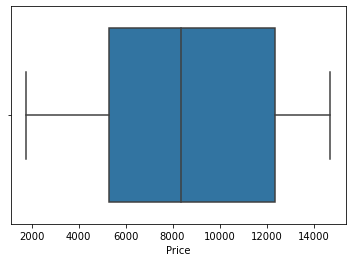

In [75]:
print(df_train['Price'].value_counts())
print(sns.boxplot(df_train['Price']))

In [76]:
#Duration_hours
print(df_train['Duration_hours'].quantile(0.10))
print(df_train['Duration_hours'].quantile(0.90))

2.0
24.0


In [77]:
df_train['Duration_hours'] = np.where(df_train['Duration_hours'] > 24.0,24.0,df_train['Duration_hours'])

2.0     2402
24.0    1120
1.0      621
3.0      501
7.0      487
5.0      481
9.0      445
12.0     428
8.0      424
13.0     407
11.0     365
10.0     355
6.0      340
14.0     337
15.0     268
23.0     264
16.0     234
4.0      222
22.0     218
21.0     196
20.0     162
18.0     141
19.0     134
17.0     129
0.0        1
Name: Duration_hours, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


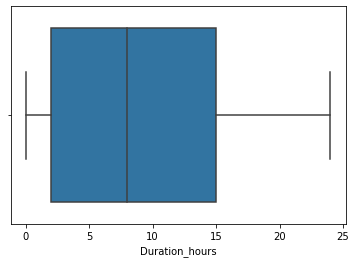

In [78]:
print(df_train['Duration_hours'].value_counts())
print(sns.boxplot(df_train['Duration_hours']))

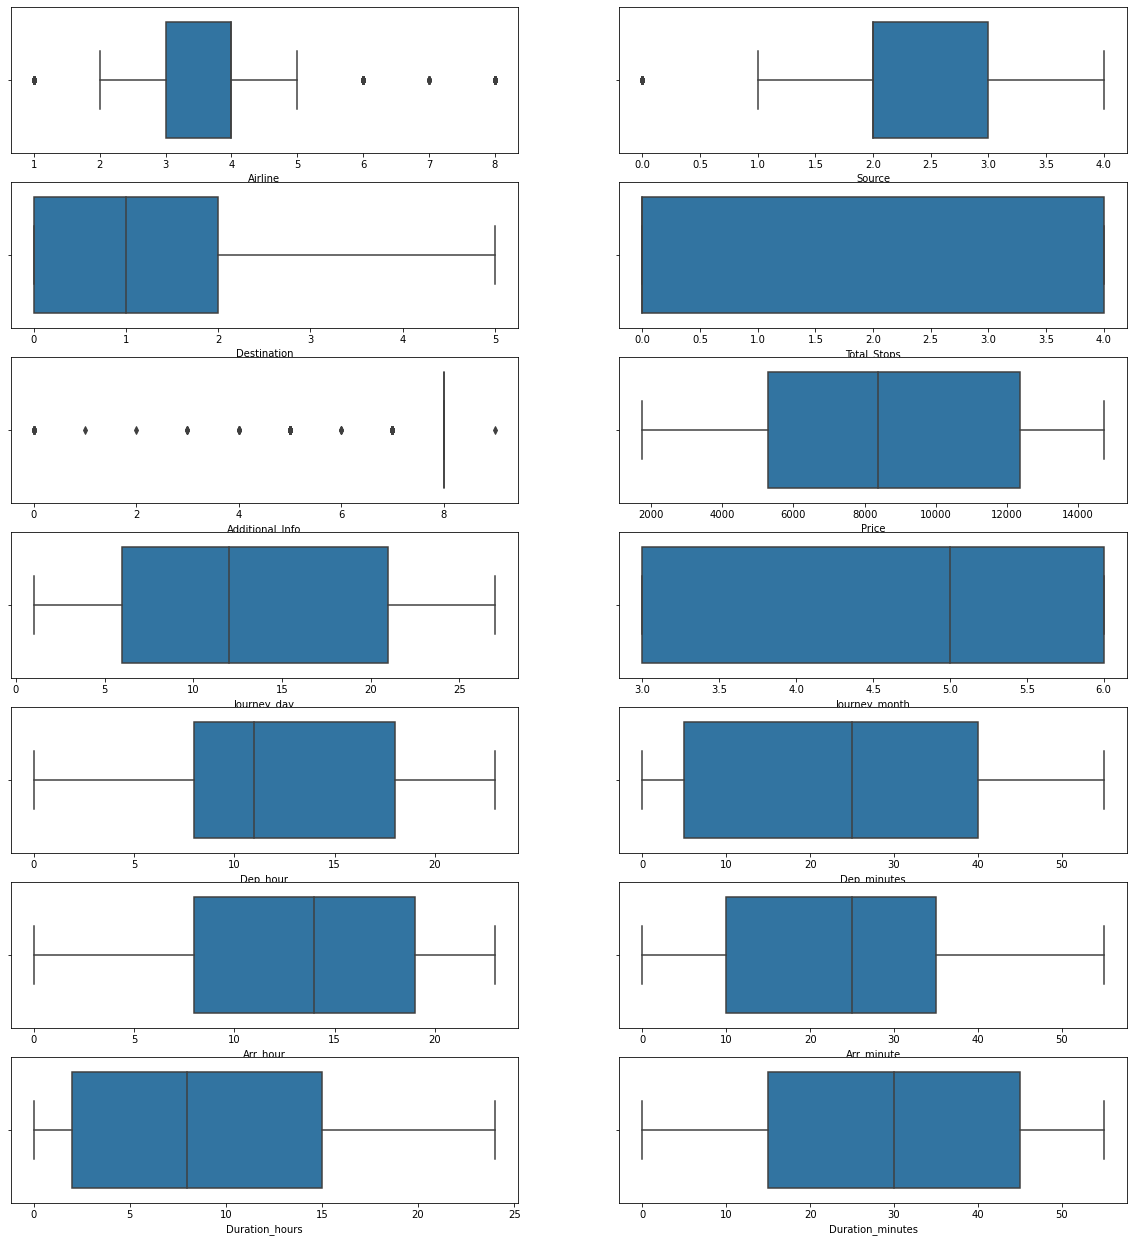

In [79]:
#Updated Df_train
plt.figure(figsize=(20,22),facecolor='white')
plotno = 1
for i in df_train:
    if plotno <= 14:
        ax = plt.subplot(7,2,plotno)
        sns.boxplot(df_train[i])
    plotno += 1
plt.show()

# Correlation Matrix

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [80]:
df_train_corr = df_train.corr()

df_train_corr

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
Airline,1.000000,-0.002811,0.007725,0.028730,-0.082482,-0.055842,0.033121,0.032040,-0.040420,-0.038624,-0.024920,-0.086977,-0.173232,-0.032774
Source,-0.002811,1.000000,-0.592576,-0.225605,-0.022109,0.075532,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040,0.173222,-0.145193
Destination,0.007725,-0.592576,1.000000,0.337872,0.026821,-0.173341,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196,-0.272056,0.061235
Total_Stops,0.028730,-0.225605,0.337872,1.000000,0.164054,-0.647872,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980,-0.644725,0.182223
Additional_Info,-0.082482,-0.022109,0.026821,0.164054,1.000000,-0.065674,-0.016296,-0.051491,-0.050983,-0.019392,0.026204,0.041310,-0.183967,0.046910
Price,-0.055842,0.075532,-0.173341,-0.647872,-0.065674,1.000000,-0.119232,-0.040536,0.008561,-0.049283,0.042052,-0.104558,0.615136,-0.141431
Journey_day,0.033121,0.004902,-0.041025,0.029225,-0.016296,-0.119232,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.023847,-0.008940
Journey_month,0.032040,0.183268,-0.364682,-0.026328,-0.051491,-0.040536,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.030021,-0.040897
Dep_hour,-0.040420,0.059047,-0.072997,0.039224,-0.050983,0.008561,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.014716,-0.023707
Dep_minutes,-0.038624,-0.056998,0.127931,0.048901,-0.019392,-0.049283,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.021220,0.092485


<AxesSubplot:>

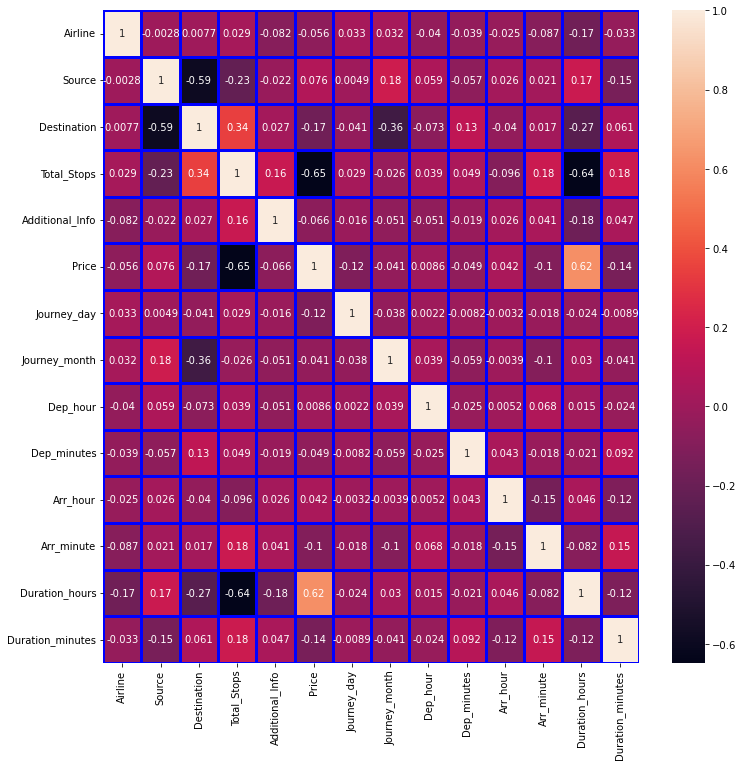

In [81]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train_corr,annot=True,linecolor='blue',linewidths=3)

With the help of about heatmap we are able to notice the correlation details between our label and feature and also amongst our labels. After eye balling the above heatmap we can see that there are no multi collinearity concerns in our dataset so we won't have to worry about dealing with them.

Text(0.5, 1.0, 'Correlation with target variable')

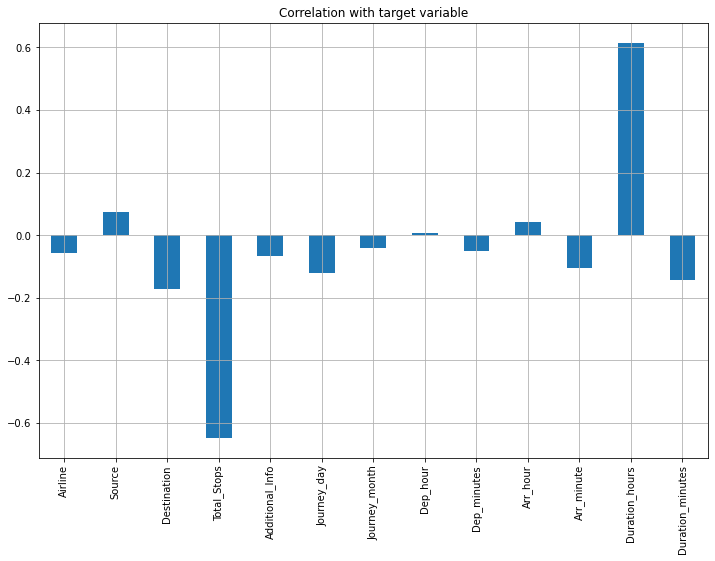

In [82]:
#Correlation with target variable

plt.figure(figsize=(12,8))
df_train.drop('Price',axis=1).corrwith(df_train['Price']).plot(kind='bar',grid=True)
plt.title('Correlation with target variable')

With the usage of above bar plot for viewing the correlation information between our Features and Label we can see that only columns arrival hour, source, month of journey and departure hours are positively correlated with our target and remaining all our feature columns are negatively correlated where total stops is highly negatively correlated indicating that as the number of total stops in an itinerary increases the price of that particular flight increases and vice a versa.

# Splitting the data into X and Y 

In [83]:
X = df_train.drop(['Price'],axis=1)
Y = df_train['Price']

I have separated the dataset into features and label where X represents all the feature columns and Y represents the regression target label column.

In [84]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
0,3.0,0.0,5,4,8,24,3,22,20,1,10,2.0,50
1,1.0,3.0,0,1,8,1,5,5,50,13,15,7.0,25
2,4.0,2.0,1,1,8,9,6,9,25,4,25,19.0,0
3,3.0,3.0,0,0,8,12,5,18,5,23,30,5.0,25
4,3.0,0.0,5,0,8,1,3,16,50,21,35,4.0,45


In [85]:
Y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

# Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_scaled.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arr_hour,Arr_minute,Duration_hours,Duration_minutes
0,-0.431263,-1.658359,2.416534,1.407210,0.499921,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-1.015966,1.279041
1,-1.383857,0.890014,-0.973812,-0.253703,0.499921,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,-0.374244,-0.196319
2,0.045035,0.040556,-0.295743,-0.253703,0.499921,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,1.165890,-1.671678
3,-0.431263,0.890014,-0.973812,-0.807341,0.499921,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,-0.630933,-0.196319
4,-0.431263,-1.658359,2.416534,-0.807341,0.499921,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,-0.759277,0.983969


I am using the StandardScaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.

# Skewness Transformations

In [87]:
from sklearn.preprocessing import power_transform
X_scaled=power_transform(X_scaled,method='yeo-johnson')
X_scaled

array([[-0.35357646, -1.51526526,  1.77102823, ..., -0.88719239,
        -1.14160015,  1.30006934],
       [-1.54933115,  0.90400517, -1.34292182, ..., -0.5679836 ,
        -0.20298731, -0.22401841],
       [ 0.16008655, -0.0834789 , -0.03231146, ...,  0.05236   ,
         1.16928529, -1.62820393],
       ...,
       [ 0.16008655, -1.51526526,  0.74034644, ..., -0.25439601,
        -0.93602026, -1.62820393],
       [ 1.7390967 , -1.51526526,  1.77102823, ..., -0.88719239,
        -1.14160015,  0.67643286],
       [-1.54933115, -0.0834789 , -0.03231146, ..., -0.5679836 ,
        -0.04338488, -0.51253633]])

# Model Building

In [88]:
#import required libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

In [89]:
X_scaled

array([[-0.35357646, -1.51526526,  1.77102823, ..., -0.88719239,
        -1.14160015,  1.30006934],
       [-1.54933115,  0.90400517, -1.34292182, ..., -0.5679836 ,
        -0.20298731, -0.22401841],
       [ 0.16008655, -0.0834789 , -0.03231146, ...,  0.05236   ,
         1.16928529, -1.62820393],
       ...,
       [ 0.16008655, -1.51526526,  0.74034644, ..., -0.25439601,
        -0.93602026, -1.62820393],
       [ 1.7390967 , -1.51526526,  1.77102823, ..., -0.88719239,
        -1.14160015,  0.67643286],
       [-1.54933115, -0.0834789 , -0.03231146, ..., -0.5679836 ,
        -0.04338488, -0.51253633]])

In [90]:
Y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

# Linear Regression

First we will start with Linear Regression to find the best random state for building our Linear Regression Model.

In [91]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    lr_r2 = r2_score(y_test, y_lr)
    
    if lr_r2>maxAccuracy:
        maxAccuracy=lr_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5434742252861263  on Random State 47


In [92]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=47)

#training our model
lr=LinearRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
lr_r2 = r2_score(y_test, y_lr)

#R2 Score
print("R2 score : ", lr_r2*100)

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_lr))
print("Mean Square Error : ",mean_squared_error(y_test,y_lr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_lr)))

R2 score :  54.34742252861263
[0.51916897 0.5392692  0.52008659 0.48928914 0.51223467]
Cross Validation Score :  0.5160097157350464
Mean Absolute Error : 2107.4127366187126
Mean Square Error :  6752117.710449275
Root Mean Square Error : 2598.4837329583715


In [93]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("K-Fold Cross Validation Score : " , l1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.51916897 0.5392692  0.52008659 0.48928914 0.51223467]
K-Fold Cross Validation Score :  0.5160097157350464


In [94]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.25)
print(shuffle)
l2 = cross_val_score(lr,X_scaled,Y,cv=shuffle)
print(l2)
print("Shuffle Split : ",l2.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None)
[0.52299004 0.52001757 0.50487416 0.5140773  0.50438264]
Shuffle Split :  0.5132683436486273


# Decision Tree

In [95]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    dt_r2 = r2_score(y_test, y_dt)
    
    if dt_r2>maxAccuracy:
        maxAccuracy=dt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.9002891948186026  on Random State 17


In [96]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=17)

#training our model
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
dt_r2 = r2_score(y_test, y_dt)

#R2 Score
print("R2 score : ", dt_r2*100)

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_dt))
print("Mean Square Error : ",mean_squared_error(y_test,y_dt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_dt)))

R2 score :  89.85587228228157
[0.88532839 0.87436581 0.87935649 0.85954097 0.86547801]
Cross Validation Score :  0.8728139324899196
Mean Absolute Error : 571.9775989017846
Mean Square Error :  1486872.848132202
Root Mean Square Error : 1219.3739574602214


In [97]:
K_fold = KFold(5)
print(K_fold)
l11 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(l11)
print("K-Fold Cross Validation Score : " , l11.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.88894615 0.87374355 0.87524998 0.85820822 0.864231  ]
K-Fold Cross Validation Score :  0.8720757813108024


In [98]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.25)
print(shuffle)
l21 = cross_val_score(dt,X_scaled,Y,cv=shuffle)
print(l21)
print("Shuffle Split : ",l21.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None)
[0.85566126 0.87183337 0.8844889  0.85939408 0.87243998]
Shuffle Split :  0.8687635176078784


# KNN

In [99]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    knn_r2 = r2_score(y_test, y_knn)
    
    if knn_r2>maxAccuracy:
        maxAccuracy=knn_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.8467757650763303  on Random State 51


In [100]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=51)

#training our model
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
knn_r2 = r2_score(y_test, y_knn)

#R2 Score
print("R2 score : ", knn_r2*100)

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_knn))
print("Mean Square Error : ",mean_squared_error(y_test,y_knn))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_knn)))

R2 score :  84.67757650763303
[0.83859408 0.84220656 0.83400381 0.82629462 0.82628122]
Cross Validation Score :  0.8334760586595852
Mean Absolute Error : 945.532609509547
Mean Square Error :  2214283.691231748
Root Mean Square Error : 1488.046938517649


In [101]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
k = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k)
print("K-Fold Cross Validation Score : " , k.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.83859408 0.84220656 0.83400381 0.82629462 0.82628122]
K-Fold Cross Validation Score :  0.8334760586595852


In [102]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.25)
print(shuffle)
k1 = cross_val_score(knn,X_scaled,Y,cv=shuffle)
print(k1)
print("Shuffle Split : ",k1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None)
[0.82819133 0.81479787 0.83103275 0.82035997 0.82967924]
Shuffle Split :  0.8248122312697408


# Support Vector Machine

In [103]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    svr=SVR()
    svr.fit(x_train, y_train)
    y_svr = svr.predict(x_test)
    svr_r2 = r2_score(y_test, y_svr)
    
    if svr_r2>maxAccuracy:
        maxAccuracy=svr_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.06981676113606772  on Random State 64


In [104]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=64)

#training our model
svr=SVR()
svr.fit(x_train, y_train)

#Predicting y_test
y_svr = svr.predict(x_test)
svr_r2 = r2_score(y_test, y_svr)

#R2 Score
print("R2 score : ", svr_r2*100)

#Cross Validation Score
cross_val_svr = cross_val_score(svr,X_scaled,Y,cv=5)
print(cross_val_svr)
print("Cross Validation Score : ",cross_val_svr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_svr))
print("Mean Square Error : ",mean_squared_error(y_test,y_svr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_svr)))

R2 score :  6.981676113606772
[0.06386594 0.05036117 0.07020328 0.07119937 0.06073083]
Cross Validation Score :  0.06327211965368167
Mean Absolute Error : 3168.0690550922327
Mean Square Error :  13404969.676291691
Root Mean Square Error : 3661.279786671826


In [105]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
s = cross_val_score(svr,X_scaled,Y,cv=K_fold)
print(s)
print("K-Fold Cross Validation Score : " , s.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.06386594 0.05036117 0.07020328 0.07119937 0.06073083]
K-Fold Cross Validation Score :  0.06327211965368167


In [106]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.25)
print(shuffle)
s1 = cross_val_score(svr,X_scaled,Y,cv=shuffle)
print(s1)
print("Shuffle Split : ",s1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None)
[0.06030165 0.05193911 0.05955319 0.05745516 0.06009966]
Shuffle Split :  0.057869752956799456


# Random Forest

In [107]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    rf_r2 = r2_score(y_test, y_rf)
    
    if rf_r2>maxAccuracy:
        maxAccuracy=rf_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.9339474155666833  on Random State 17


In [108]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=17)

#training our model
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
rf_r2 = r2_score(y_test, y_rf)

#R2 Score
print("R2 score : ", rf_r2*100)

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_rf))
print("Mean Square Error : ",mean_squared_error(y_test,y_rf))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_rf)))

R2 score :  93.21987879319018
[0.92700339 0.92918184 0.92365444 0.91143881 0.92102238]
Cross Validation Score :  0.9224601727233062
Mean Absolute Error : 551.269574182889
Mean Square Error :  993794.4799179104
Root Mean Square Error : 996.8924114055189


In [109]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
r = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r)
print("K-Fold Cross Validation Score : " , r.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.926394   0.92928352 0.92345284 0.91107075 0.92144715]
K-Fold Cross Validation Score :  0.9223296523952739


In [110]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.25)
print(shuffle)
r1 = cross_val_score(rf,X_scaled,Y,cv=shuffle)
print(r1)
print("Shuffle Split : ",r1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None)
[0.91951049 0.9252778  0.92158477 0.92191058 0.92721783]
Shuffle Split :  0.9231002945825738


# Ada Boost

In [111]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    y_ad = ad.predict(x_test)
    ad_r2 = r2_score(y_test, y_ad)
    
    if ad_r2>maxAccuracy:
        maxAccuracy=ad_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.6761562554288763  on Random State 93


In [112]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=23)

#training our model
ad=AdaBoostRegressor()
ad.fit(x_train, y_train)

#Predicting y_test
y_ad = ad.predict(x_test)
ad_r2 = r2_score(y_test, y_ad)

#R2 Score
print("R2 score : ", ad_r2*100)

#Cross Validation Score
cross_score_ad = cross_val_score(ad,X_scaled,Y,cv=5)
print(cross_score_ad)
print("Cross Validation Score : ",cross_score_ad.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_ad))
print("Mean Square Error : ",mean_squared_error(y_test,y_ad))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_ad)))

R2 score :  64.63793207918404
[0.65275582 0.66088091 0.64440983 0.63501129 0.68206231]
Cross Validation Score :  0.655024033653446
Mean Absolute Error : 1912.2476049483507
Mean Square Error :  5181397.952384892
Root Mean Square Error : 2276.2684271379094


In [113]:
K_fold = KFold(5)
print(K_fold)
a = cross_val_score(ad,X_scaled,Y,cv=K_fold)
print(a)
print("K-Fold Cross Validation Score : " , a.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.63337039 0.63702674 0.64148004 0.65599893 0.66441857]
K-Fold Cross Validation Score :  0.646458936704446


In [114]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.25)
print(shuffle)
a1 = cross_val_score(ad,X_scaled,Y,cv=shuffle)
print(a1)
print("Shuffle Split : ",a1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None)
[0.62783003 0.64956053 0.65334124 0.63266504 0.61676093]
Shuffle Split :  0.6360315535501095


# Gradient Boost

In [115]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    gb=GradientBoostingRegressor()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    gb_r2 = r2_score(y_test, y_gb)
    
    if gb_r2>maxAccuracy:
        maxAccuracy=gb_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.8513203392247055  on Random State 58


In [116]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=58)

#training our model
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
gb_r2 = r2_score(y_test, y_gb)

#R2 Score
print("R2 score : ", gb_r2)

#Cross Validation Score
cross_score_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_score_gb)
print("Cross Validation Score : ",cross_score_gb.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_gb))
print("Mean Square Error : ",mean_squared_error(y_test,y_gb))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_gb)))

R2 score :  0.8513203392247056
[0.84164147 0.84291362 0.83698239 0.82598988 0.84493606]
Cross Validation Score :  0.8384926858797759
Mean Absolute Error : 1099.9899974762293
Mean Square Error :  2215923.586735286
Root Mean Square Error : 1488.597859307639


In [117]:
K_fold = KFold(5)
print(K_fold)
g = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g)
print("K-Fold Cross Validation Score : " , g.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.84164147 0.84287013 0.83707758 0.82598988 0.8449623 ]
K-Fold Cross Validation Score :  0.8385082698545634


In [118]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
g1 = cross_val_score(gb,X_scaled,Y,cv=shuffle)
print(g1)
print("Shuffle Split : ",g1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.83835032 0.83536389 0.8361317  0.8334758  0.83369217]
Shuffle Split :  0.83540277636864


# XG Boost

In [119]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    xgbt=xgb.XGBRegressor()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    xgbt_r2 = r2_score(y_test, y_xgbt)
    
    if xgbt_r2>maxAccuracy:
        maxAccuracy=xgbt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.9428561227691336  on Random State 5


In [120]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=5)

#training our model
xgbt=xgb.XGBRegressor()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
xgbt_r2 = r2_score(y_test, y_xgbt)

#R2 Score
print("R2 score : ", xgbt_r2*100)

#Cross Validation Score
cross_score_xgbt = cross_val_score(xgbt,X_scaled,Y,cv=5)
print(cross_score_xgbt)
print("Cross Validation Score : ",cross_score_xgbt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_xgbt))
print("Mean Square Error : ",mean_squared_error(y_test,y_xgbt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_xgbt)))

R2 score :  94.28561227691335
[0.93712718 0.93182701 0.9345144  0.92445496 0.93053852]
Cross Validation Score :  0.9316924147788604
Mean Absolute Error : 599.4430019388659
Mean Square Error :  855566.7953999925
Root Mean Square Error : 924.9685375189756


In [121]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
xg = cross_val_score(xgbt,X_scaled,Y,cv=K_fold)
print(xg)
print("K-Fold Cross Validation Score : " , xg.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.93712718 0.93182701 0.9345144  0.92445496 0.93053852]
K-Fold Cross Validation Score :  0.9316924147788604


In [122]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.25)
print(shuffle)
xg1 = cross_val_score(xgbt,X_scaled,Y,cv=shuffle)
print(xg1)
print("Shuffle Split : ",xg1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None)
[0.93556806 0.92684428 0.93563403 0.92793705 0.9286872 ]
Shuffle Split :  0.930934121765423


# R2 Scores

In [123]:
print("R2 Scores : ")
print("---------------------------------------------")
print("Linear Regression :        ",lr_r2*100)
print("Decision Tree :            ",dt_r2*100)
print("KNN :                      ",knn_r2*100)
print("Support Vector Machine :   ",svr_r2*100)
print("Random Forest :            ",rf_r2*100)
print("Ada Boost :                ",ad_r2*100)
print("Gradient Boost :           ",gb_r2*100)
print("XGBoost :                  ", xgbt_r2*100)

R2 Scores : 
---------------------------------------------
Linear Regression :         54.34742252861263
Decision Tree :             89.85587228228157
KNN :                       84.67757650763303
Support Vector Machine :    6.981676113606772
Random Forest :             93.21987879319018
Ada Boost :                 64.63793207918404
Gradient Boost :            85.13203392247057
XGBoost :                   94.28561227691335


# HyperParameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
#Choosing XG Boost Regressor

params = {
    'max_depth' : [3,6,10],
    'learning_rate' : [0.01,0.05,0.1],
    'n_estimators' : [100,150,200],
    'colsample_bytree' : [0.3,0.7]
}

I have chosen the XGB regressor as my best model since it is able to provide me the highest R2 score plus the model is doing better in Cross validation score too. In the above cell I have listed all the parameters for XGB regressor that can be used for hyper tuning our final model.

In [126]:
gs_xgboost = GridSearchCV(xgbt,param_grid=params,scoring='neg_mean_squared_error',verbose=1)

gs_xgboost

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_o...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [127]:
gs_xgboost.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_o...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

We are training our model by providing all the parameters we deem fit so it can go through all the permutations and combinations and identify the best value.

In [128]:
gs_xgboost.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 10,
 'n_estimators': 150}

In [129]:
gs_xgboost.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [130]:
final_model = xgb.XGBRegressor(colsample_bytree=0.7,learning_rate=0.05,max_depth=10,n_estimators=150)
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("R2 Score :",r2_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Mean Absolute Error :",mean_absolute_error(y_test,final_model_pred))
print("Mean Square Error : ",mean_squared_error(y_test,final_model_pred))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,final_model_pred)))
print("------------------------------------------------------------------------")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
------------------------------------------------------------------------
[10364.007   4004.0925  7832.6953 ...  5009.421  10904.318   9163.054 ]
R2 Score : 0.9438776590123376
------------------------------------------------------------------------
Mean Absolute Error : 557

We have built our final model using the hyper tuned parameters which look like it is not doing better than the default values but it can always be tuned better to get better results.

# Test Data

I will do data preprocessing on test data for prediction

In [176]:
df_test = pd.read_excel("Test_set.xlsx")

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [177]:
df_test.shape

(2671, 10)

In [178]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [179]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [180]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# EDA

In [181]:
#Checking for missing values
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [182]:
#Handling Dep_time and converting into Dep_hour

df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_hour
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,17
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,6
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,8
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,23


In [183]:
#Handling Dep_Time and converting into Dep_minutes

df_test['Dep_minutes'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,8,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,23,55


In [184]:
#Dropping Dep_time because I have separated the Dep_Time into Dep_hour and Dep_minutes

df_test.drop(['Dep_Time'],axis=1,inplace=True)

In [185]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,8,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,23,55


In [186]:
#Handling Date_of_Journey

#Date_of_Journey ----> Journey_day
df_test['Journey_day'] = pd.to_datetime(df_test['Date_of_Journey'],format="%d/%m/%Y").dt.day

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,17,30,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,6,20,12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15,21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,8,0,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,23,55,24


In [187]:
#Date_of_Journey ----> Journey_month
df_test['Journey_month'] = pd.to_datetime(df_test['Date_of_Journey'],format="%d/%m/%Y").dt.month

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,17,30,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,6,20,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,8,0,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,23,55,24,6


In [188]:
#Dropping Date_of_Journey because I have separated the columns between days and months

df_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [189]:
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,17,30,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,6,20,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,8,0,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,23,55,24,6


In [190]:
#Handling Arrival_time and converting into Arr_hour

df_test['Arr_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour

df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,17,30,6,6,4
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,6,20,12,5,10
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15,21,5,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,8,0,21,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,23,55,24,6,2


In [191]:
#Handling Arrival_time and converting into Arr_minutes

df_test['Arr_minutes'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour,Arr_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,17,30,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,6,20,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,8,0,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,23,55,24,6,2,45


In [192]:
#Dropping Arr_Time because I have separated the columns between Arr_hour and Arr_minute

df_test.drop(['Arrival_Time'],axis=1,inplace=True)


In [193]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour,Arr_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,17,30,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,6,20,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,19,15,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,8,0,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,23,55,24,6,2,45


In [194]:
#Handling Duration Time
duration1 = list(df_test['Duration'])

len(duration1)


2671

In [195]:
#Handling Duration Time

#Taking a for loop with duration list length as the range
for i in range(len(duration1)):
    if len(duration1[i].split()) != 2:    #Checking if duration contains only hours or mins
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"   #Adds 0 minute
        else:
            duration1[i] = "0h " + duration1[i]           #Adds 0 hour


#Taking empty lists
duration_hours = []
duration_mins = []

#Appending the extracted data to these empty lists in integer format
for i in range(len(duration1)):
    duration_hours.append(int(duration1[i].split(sep = "h")[0]))    #Extract hours from duration 
    duration_mins.append(int(duration1[i].split(sep = "m")[0].split()[-1]))   #Extracting only minutes from duration

In [196]:
#Converting list into dataframe
df_test['Duration_hours'] = duration_hours
df_test['Duration_minutes'] = duration_mins

In [197]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour,Arr_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,17,30,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,6,20,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,19,15,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,8,0,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,23,55,24,6,2,45,2,50


In [198]:
df_test.drop(['Duration'],axis=1,inplace=True)

In [199]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour,Arr_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,17,30,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,6,20,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,19,15,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8,0,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,23,55,24,6,2,45,2,50


In [200]:
#Dropping Route because I already have Source and Destination

df_test.drop(['Route'],axis=1,inplace=True)

In [201]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour,Arr_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,No info,17,30,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,6,20,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,19,15,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,8,0,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,No info,23,55,24,6,2,45,2,50


# Encoding 

In [202]:
cat_var_test = df_test.select_dtypes(include=['O'])

cat_var_test

,Airline,Source,Destination,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,1 stop,No info
1,IndiGo,Kolkata,Banglore,1 stop,No info
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,1 stop,No info
4,Air Asia,Banglore,Delhi,non-stop,No info
...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,No info
2667,IndiGo,Kolkata,Banglore,non-stop,No info
2668,Jet Airways,Delhi,Cochin,1 stop,No info
2669,Air India,Delhi,Cochin,1 stop,No info


In [203]:
#Checking frequency of values in cat_var_test
for ii in cat_var_test:
    cc = df_test[ii].value_counts()
    print(cc)
    print('-'*40)

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
----------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
----------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
----------------------------------------
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64
-----------------------------

I will be using Label Encoder to convert into numerical type.

In [204]:
le_test = LabelEncoder()

In [205]:
for c in cat_var_test:
    df_test[c] = le_test.fit_transform(df_test[c])
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour,Arr_minutes,Duration_hours,Duration_minutes
0,4,2,1,0,5,17,30,6,6,4,25,10,55
1,3,3,0,0,5,6,20,12,5,10,20,4,0
2,4,2,1,0,3,19,15,21,5,19,0,23,45
3,6,2,1,0,5,8,0,21,5,21,0,13,0
4,0,0,2,4,5,23,55,24,6,2,45,2,50


# Skewness

In [206]:
df_test.skew()

Airline             0.483882
Source             -0.424997
Destination         1.263630
Total_Stops         0.672623
Additional_Info    -1.719119
Dep_hour            0.093759
Dep_minutes         0.128515
Journey_day         0.199540
Journey_month      -0.403700
Arr_hour           -0.443166
Arr_minutes         0.115267
Duration_hours      0.884647
Duration_minutes   -0.104482
dtype: float64

# PowerTransformer

In [207]:
from sklearn.preprocessing import PowerTransformer

In [208]:
pt_test = PowerTransformer()

In [209]:
df_test = pd.DataFrame(pt_test.fit_transform(df_test),columns=df_test.columns)

In [210]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour,Arr_minutes,Duration_hours,Duration_minutes
0,0.121699,-0.020266,0.003984,-0.891778,0.493105,0.791425,0.443282,-0.753498,1.162712,-1.361817,0.174993,0.323958,1.459539
1,-0.324499,0.887705,-1.378552,-0.891778,0.493105,-1.178018,0.004594,0.038985,0.145285,-0.525790,-0.100464,-0.615366,-1.892591
2,0.121699,-0.020266,0.003984,-0.891778,-2.059390,1.101906,-0.253964,0.968484,0.145285,0.769761,-1.731559,1.327137,0.963242
3,0.905569,-0.020266,0.003984,-0.891778,0.493105,-0.772489,-1.569608,0.968484,0.145285,1.062125,-1.731559,0.625964,-1.892591
4,-2.156375,-1.598446,0.709207,1.312760,0.493105,1.695694,1.300449,1.239238,1.162712,-1.631447,1.121493,-1.186557,1.214123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,-1.410871,0.887705,-1.378552,-0.891778,0.493105,1.253536,0.443282,-0.753498,1.162712,0.915774,0.174993,1.327137,1.459539
2667,-0.324499,0.887705,-1.378552,1.312760,0.493105,0.304857,0.004594,1.496187,-1.400476,0.333918,1.535120,-1.186557,0.441931
2668,0.121699,-0.020266,0.003984,-0.891778,0.493105,1.402960,1.147108,-0.753498,-1.400476,-1.361817,0.174993,-0.223314,0.441931
2669,-1.410871,-0.020266,0.003984,-0.891778,0.493105,-1.621454,-1.569608,-0.753498,-1.400476,0.769761,-0.401572,0.796260,-0.720251


# Feature Selection

In [211]:
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

In [212]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Dep_hour,Dep_minutes,Journey_day,Journey_month,Arr_hour,Arr_minutes,Duration_hours,Duration_minutes
0,0.121699,-0.020266,0.003984,-0.891778,0.493105,0.791425,0.443282,-0.753498,1.162712,-1.361817,0.174993,0.323958,1.459539
1,-0.324499,0.887705,-1.378552,-0.891778,0.493105,-1.178018,0.004594,0.038985,0.145285,-0.525790,-0.100464,-0.615366,-1.892591
2,0.121699,-0.020266,0.003984,-0.891778,-2.059390,1.101906,-0.253964,0.968484,0.145285,0.769761,-1.731559,1.327137,0.963242
3,0.905569,-0.020266,0.003984,-0.891778,0.493105,-0.772489,-1.569608,0.968484,0.145285,1.062125,-1.731559,0.625964,-1.892591
4,-2.156375,-1.598446,0.709207,1.312760,0.493105,1.695694,1.300449,1.239238,1.162712,-1.631447,1.121493,-1.186557,1.214123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,-1.410871,0.887705,-1.378552,-0.891778,0.493105,1.253536,0.443282,-0.753498,1.162712,0.915774,0.174993,1.327137,1.459539
2667,-0.324499,0.887705,-1.378552,1.312760,0.493105,0.304857,0.004594,1.496187,-1.400476,0.333918,1.535120,-1.186557,0.441931
2668,0.121699,-0.020266,0.003984,-0.891778,0.493105,1.402960,1.147108,-0.753498,-1.400476,-1.361817,0.174993,-0.223314,0.441931
2669,-1.410871,-0.020266,0.003984,-0.891778,0.493105,-1.621454,-1.569608,-0.753498,-1.400476,0.769761,-0.401572,0.796260,-0.720251


With the usage of StandardScaler we have transformed all our feature values in a normalized format to avoid biases in our regression model.

Now I will use the df_test data and predict on my final model

In [213]:
final_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Final Model - XGBRegressor

In [214]:
predicted_values = final_model.predict(df_test)

data = pd.DataFrame(predicted_values,columns=['Predicted Flight Prices'])

data

,Predicted Flight Prices
0,13434.869141
1,6581.135742
2,14228.634766
3,14168.754883
4,3898.438721
...,...
2666,8593.942383
2667,4784.562012
2668,13988.249023
2669,13408.133789


Here we are using our best model algorithm to predict the target label and show it in a dataframe. This information can also be exported in a spread sheet if required.

# Saving my best model

In [219]:
import pickle

In [220]:
filename = "Flight Price Prediction.pkl"

In [221]:
pickle.dump(final_model,open(filename,'wb'))

Finally I have saved my best Regression model using the pickle library.

# OPTIONAL

Now here I am using every algorithm to predict flight prices.

In [215]:
#Optional
rf

RandomForestRegressor()

In [216]:
predicted_values_rf = rf.predict(df_test)

data_rf = pd.DataFrame(predicted_values_rf,columns=['Predicted Flight Prices'])

data_rf

,Predicted Flight Prices
0,14706.27
1,5888.13
2,13315.68
3,14524.79
4,3802.28
...,...
2666,7480.34
2667,4793.64
2668,14697.00
2669,14380.85


In [217]:
lr

LinearRegression()

In [218]:
predicted_values_lr = lr.predict(df_test)

data_lr = pd.DataFrame(predicted_values_lr,columns=['Predicted Flight Prices'])

data_lr

,Predicted Flight Prices
0,9920.999409
1,8847.518391
2,11239.394731
3,12158.360153
4,4381.422097
...,...
2666,10958.893228
2667,5084.809268
2668,8737.240332
2669,12077.613818
